In [9]:
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import nltk #For tokenizing and normalizing
import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn as sns#Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas as pd
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

In [10]:
lyrics_df = pd.read_csv("cleaned_lyrics_year.csv")
lyrics_df['genre'] = lyrics_df['genre'].astype('category')
lyrics_df

year           artist    genre  \
0       2009  beyonce-knowles      Pop   
1       2009  beyonce-knowles      Pop   
2       2009  beyonce-knowles      Pop   
3       2009  beyonce-knowles      Pop   
4       2009  beyonce-knowles      Pop   
...      ...              ...      ...   
210637  2012       edens-edge  Country   
210638  2012       edens-edge  Country   
210639  2012       edens-edge  Country   
210640  2012       edens-edge  Country   
210641  2012       edens-edge  Country   

                                                   lyrics  \
0       oh baby, how you doing? you know i'm gonna cut...   
1       playin' everything so easy, it's like you seem...   
2       if you search for tenderness it isn't hard to ...   
3       oh oh oh i, oh oh oh i   if i wrote a book abo...   
4       party the people, the people the party it's po...   
...                                                   ...   
210637  i gotta say boy, after only just a couple of d...   
210638  i helped you find her diamond ring you made me...   
210639  look at the couple in the corner booth looks a...   
210640  when i fly off this mortal earth and i'm measu...   
210641  i heard from a friend of a friend of a friend ...   

                                               normalized  
0       ['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut...  
1       ['playin', 'easy', 'like', 'sure', 'way', 'not...  
2       ['search', 'tenderness', 'hard', 'find', 'love...  
3       ['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'write', ...  
4       ['party', 'people', 'people', 'party', 'pop', ...  
...                                                   ...  
210637  ['get', 'ta', 'boy', 'couple', 'date', 'hand',...  
210638  ['help', 'find', 'diamond', 'ring', 'try', 'to...  
210639  ['look', 'couple', 'corner', 'booth', 'look', ...  
210640  ['fly', 'mortal', 'earth', 'be', 'measure', 'd...  
210641  ['hear', 'friend', 'friend', 'friend', 'finall...  

[210642 rows x 5 columns]

In [11]:
from multiprocessing import Pool
import ast
p = Pool()
lyrics_df['normalized'] = p.map(ast.literal_eval, lyrics_df['normalized'])
lyrics_df['normalized'][0]

['oh',
 'baby',
 'know',
 'be',
 'gon',
 'na',
 'cut',
 'right',
 'chase',
 'woman',
 'like',
 'think',
 'create',
 'special',
 'purpose',
 'know',
 'special',
 'feel',
 'baby',
 'let',
 'lose',
 'need',
 'work',
 'because',
 'boss',
 'real',
 'want',
 'feel',
 'consider',
 'lucky',
 'big',
 'deal',
 'get',
 'key',
 'heart',
 'have',
 'gon',
 'na',
 'need',
 'open',
 'body',
 'secret',
 'know',
 'inside',
 'need',
 'lie',
 'big',
 'wide',
 'strong',
 'wo',
 'fit',
 'tough',
 'talk',
 'like',
 'because',
 'get',
 'big',
 'ego',
 'huge',
 'ego',
 'love',
 'big',
 'ego',
 'walk',
 'like',
 'because',
 'usually',
 'be',
 'humble',
 'right',
 'choose',
 'leave',
 'blue',
 'arrogant',
 'confident',
 'decide',
 'find',
 'be',
 'work',
 'damn',
 'know',
 'be',
 'kill',
 'leg',
 'well',
 'thigh',
 'matt',
 'fact',
 'smile',
 'maybe',
 'eye',
 'boy',
 'site',
 'kind',
 'like',
 'big',
 'wide',
 'strong',
 'wo',
 'fit',
 'tough',
 'talk',
 'like',
 'because',
 'get',
 'big',
 'ego',
 'huge',
 'eg

In [4]:
# preprocessing
lyrics_tuples = [(row['normalized'],[index, str(row['year']),row['genre']]) for index,row in lyrics_df.iterrows()]
lyrics_tuples[0]

(['oh',
  'baby',
  'know',
  'be',
  'gon',
  'na',
  'cut',
  'right',
  'chase',
  'woman',
  'like',
  'think',
  'create',
  'special',
  'purpose',
  'know',
  'special',
  'feel',
  'baby',
  'let',
  'lose',
  'need',
  'work',
  'because',
  'boss',
  'real',
  'want',
  'feel',
  'consider',
  'lucky',
  'big',
  'deal',
  'get',
  'key',
  'heart',
  'have',
  'gon',
  'na',
  'need',
  'open',
  'body',
  'secret',
  'know',
  'inside',
  'need',
  'lie',
  'big',
  'wide',
  'strong',
  'wo',
  'fit',
  'tough',
  'talk',
  'like',
  'because',
  'get',
  'big',
  'ego',
  'huge',
  'ego',
  'love',
  'big',
  'ego',
  'walk',
  'like',
  'because',
  'usually',
  'be',
  'humble',
  'right',
  'choose',
  'leave',
  'blue',
  'arrogant',
  'confident',
  'decide',
  'find',
  'be',
  'work',
  'damn',
  'know',
  'be',
  'kill',
  'leg',
  'well',
  'thigh',
  'matt',
  'fact',
  'smile',
  'maybe',
  'eye',
  'boy',
  'site',
  'kind',
  'like',
  'big',
  'wide',
  'str

In [5]:
#Doc2vec
import gensim
tagged_lyrics = p.starmap(gensim.models.doc2vec.TaggedDocument, lyrics_tuples)
tagged_lyrics[0]

TaggedDocument(words=['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut', 'right', 'chase', 'woman', 'like', 'think', 'create', 'special', 'purpose', 'know', 'special', 'feel', 'baby', 'let', 'lose', 'need', 'work', 'because', 'boss', 'real', 'want', 'feel', 'consider', 'lucky', 'big', 'deal', 'get', 'key', 'heart', 'have', 'gon', 'na', 'need', 'open', 'body', 'secret', 'know', 'inside', 'need', 'lie', 'big', 'wide', 'strong', 'wo', 'fit', 'tough', 'talk', 'like', 'because', 'get', 'big', 'ego', 'huge', 'ego', 'love', 'big', 'ego', 'walk', 'like', 'because', 'usually', 'be', 'humble', 'right', 'choose', 'leave', 'blue', 'arrogant', 'confident', 'decide', 'find', 'be', 'work', 'damn', 'know', 'be', 'kill', 'leg', 'well', 'thigh', 'matt', 'fact', 'smile', 'maybe', 'eye', 'boy', 'site', 'kind', 'like', 'big', 'wide', 'strong', 'wo', 'fit', 'tough', 'talk', 'like', 'because', 'get', 'big', 'ego', 'huge', 'ego', 'love', 'big', 'ego', 'walk', 'like', 'because', 'walk', 'like', 'because', 'talk',

In [6]:
lyrics_D2V_100 = gensim.models.doc2vec.Doc2Vec(tagged_lyrics, vector_size = 100, seed = 0, epochs = 10, workers=4)

In [7]:
lyrics_D2V_100.save('word embedding models/full_100.mm')

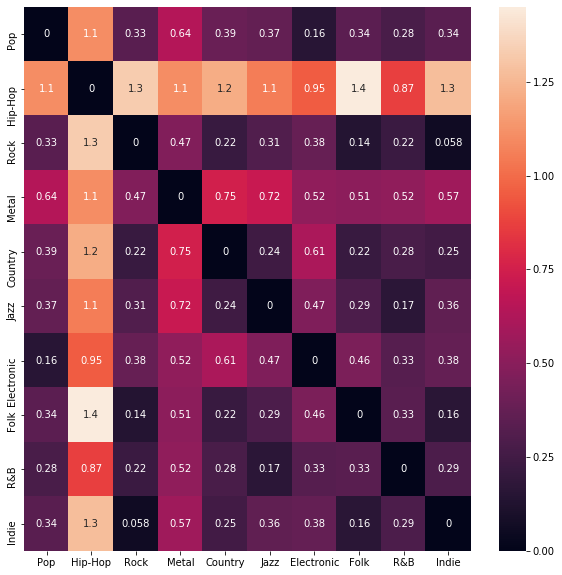

In [8]:
genre_embeddings_100 = [lyrics_D2V_100.docvecs[i] for i in pd.unique(lyrics_df['genre'])]

from scipy.spatial.distance import cosine
M = []
for p in genre_embeddings_100:
    L = []
    for q in genre_embeddings_100:
        L.append(cosine(p,q))
    M.append(L)
plt.rcParams['figure.figsize'] = [10,10]
sns.heatmap(np.array(M), xticklabels=pd.unique(lyrics_df['genre']), 
            yticklabels=pd.unique(lyrics_df['genre']), annot=True)
#plt.savefig('Pictures/')

In [11]:
lyrics_D2V_50 = gensim.models.doc2vec.Doc2Vec(tagged_lyrics, vector_size = 50,seed = 0)
lyrics_D2V_50.save('word embedding models/full_50.mm')

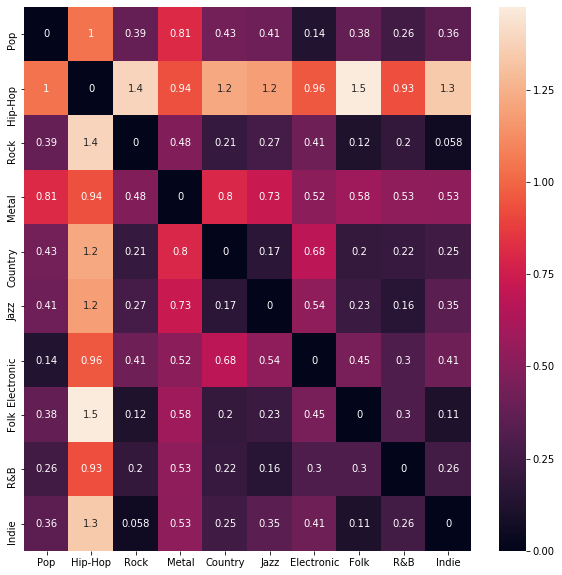

In [12]:
genre_embeddings_50 = [lyrics_D2V_50.docvecs[i] for i in pd.unique(lyrics_df['genre'])]

from scipy.spatial.distance import cosine
M = []
for p in genre_embeddings_50:
    L = []
    for q in genre_embeddings_50:
        L.append(cosine(p,q))
    M.append(L)
plt.rcParams['figure.figsize'] = [10,10]
sns.heatmap(np.array(M), xticklabels=pd.unique(lyrics_df['genre']), 
            yticklabels=pd.unique(lyrics_df['genre']), annot=True)

In [9]:
lyrics_D2V_20 = gensim.models.doc2vec.Doc2Vec(tagged_lyrics, vector_size = 20,seed = 0, epochs = 10, workers=4)
lyrics_D2V_20.save('word embedding models/full_20.mm')

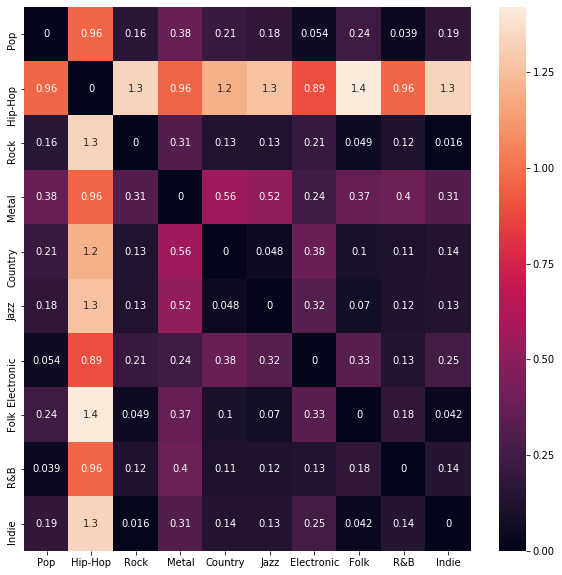

In [10]:
genre_embeddings_20 = [lyrics_D2V_20.docvecs[i] for i in pd.unique(lyrics_df['genre'])]

from scipy.spatial.distance import cosine
M = []
for p in genre_embeddings_20:
    L = []
    for q in genre_embeddings_20:
        L.append(cosine(p,q))
    M.append(L)
plt.rcParams['figure.figsize'] = [10,10]
sns.heatmap(np.array(M), xticklabels=pd.unique(lyrics_df['genre']), 
            yticklabels=pd.unique(lyrics_df['genre']), annot=True)

In [41]:
lyrics_D2V_10 = gensim.models.doc2vec.Doc2Vec(tagged_lyrics, vector_size = 10,seed = 0, epochs = 10, workers=4)
lyrics_D2V_10.save('word embedding models/full_10.mm')

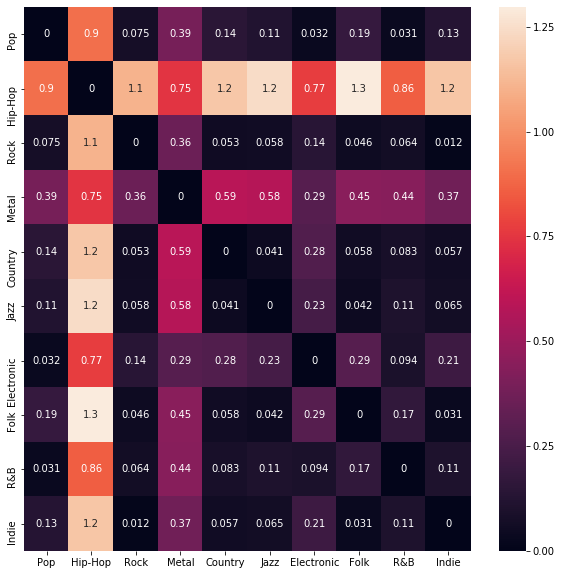

In [42]:
genre_embeddings_10 = [lyrics_D2V_10.docvecs[i] for i in pd.unique(lyrics_df['genre'])]

from scipy.spatial.distance import cosine
M = []
for p in genre_embeddings_10:
    L = []
    for q in genre_embeddings_10:
        L.append(cosine(p,q))
    M.append(L)
plt.rcParams['figure.figsize'] = [10,10]
sns.heatmap(np.array(M), xticklabels=pd.unique(lyrics_df['genre']), 
            yticklabels=pd.unique(lyrics_df['genre']), annot=True)

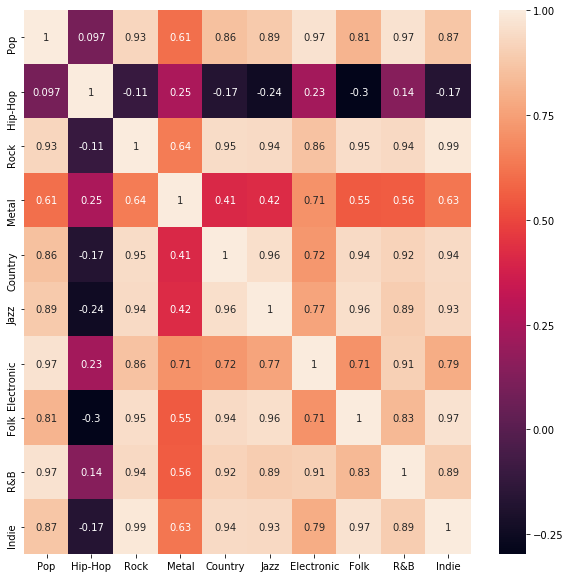

In [97]:
M = []
for p in pd.unique(lyrics_df['genre']):
    L = []
    for q in pd.unique(lyrics_df['genre']):
        L.append(lyrics_D2V_10.docvecs.similarity(p,q))
    M.append(L)
plt.rcParams['figure.figsize'] = [10,10]
sns.heatmap(np.array(M), xticklabels=pd.unique(lyrics_df['genre']), 
            yticklabels=pd.unique(lyrics_df['genre']), annot=True)
plt.savefig('Pictures/word-embedding genre similarity')

## word similarity

In [43]:
similar_words = {}
for i in pd.unique(lyrics_df['genre']):
    pos = [lyrics_D2V_10[i]]
    neg = [lyrics_D2V_10[k] for k in pd.unique(lyrics_df['genre']) if k!=i]
    similar_words[i] = lyrics_D2V_10.most_similar(positive=pos, topn=1)
similar_words

{'Pop': [('love', 0.9088281393051147)],
 'Hip-Hop': [('gangsta', 0.9701336622238159)],
 'Rock': [('heartache', 0.9514038562774658)],
 'Metal': [('torment', 0.9457528591156006)],
 'Country': [('lonely', 0.9738636016845703)],
 'Jazz': [('sweetheart', 0.9644280672073364)],
 'Electronic': [('destro', 0.9430480003356934)],
 'Folk': [('weary', 0.9391343593597412)],
 'R&B': [('darlin', 0.9145206212997437)],
 'Indie': [('heartache', 0.946638822555542)]}

## most relevant documents

In [46]:
similar_songs = {}
for i in pd.unique(lyrics_df['genre']):
    pos = [i]
    neg = [k for k in pd.unique(lyrics_df['genre']) if k!=i]
    similar_songs[i] = lyrics_D2V_10.docvecs.most_similar(positive=pos, topn=1)
similar_songs

{'Pop': [('R&B', 0.9694342613220215)],
 'Hip-Hop': [(96309, 0.9279831647872925)],
 'Rock': [('Indie', 0.9878256916999817)],
 'Metal': [(4335, 0.9715218544006348)],
 'Country': [('1985', 0.9856895804405212)],
 'Jazz': [('1973', 0.9820269346237183)],
 'Electronic': [(26212, 0.9708034992218018)],
 'Folk': [('1970', 0.9884846210479736)],
 'R&B': [('Pop', 0.9694343209266663)],
 'Indie': [('Rock', 0.9878256916999817)]}

## Projections

In [32]:
import gensim
lyrics_D2V_10 = gensim.models.doc2vec.Doc2Vec.load('word embedding models/full_10.mm')

In [7]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

In [8]:
happy_words = [x for x in ['happy','fun','joy','enjoy','glad','cheerful','smile','delight'] if x in lyrics_D2V_10.wv.index2word] 
sad_words = [x for x in ['sad','sorrow','cry','tear','unhappy','mournful','miserable','gloomy'] if x in lyrics_D2V_10.wv.index2word]
man_words = [x for x in ['man','boy','male','him','he'] if x in lyrics_D2V_10.wv.index2word]
woman_words = [x for x in ['woman', 'her', 'she', 'girl', 'female'] if x in lyrics_D2V_10.wv.index2word]
romance_words = [x for x in ['love', 'baby','kiss','heartbreak','romance'] if x in lyrics_D2V_10.wv.index2word]
inromance_words = [x for x in ['time','life','people','fate','world'] if x in lyrics_D2V_10.wv.index2word]

In [9]:
emotion = dimension(lyrics_D2V_10, happy_words, sad_words)
gender = dimension(lyrics_D2V_10, man_words, woman_words)
romance = dimension(lyrics_D2V_10, romance_words, inromance_words)

In [12]:
from scipy.spatial.distance import cosine
def makeDF(model, word_list):
    e = []
    g = []
    r = []
    for word in word_list:
        e.append(1-cosine(model[word], emotion))
        g.append(1-cosine(model[word], gender))
        r.append(1-cosine(model[word], romance))
    df = pd.DataFrame({'emotion': e, 'gender': g, 'romance': r}, index = word_list)
    return df

In [13]:
genre_dim_df = makeDF(lyrics_D2V_10, pd.unique(lyrics_df['genre']))

In [14]:
genre_dim_df

emotion    gender   romance
Pop         0.071002 -0.177638  0.169118
Hip-Hop     0.183291  0.055826 -0.374592
Rock       -0.178751  0.103498  0.102201
Metal      -0.459461  0.194164 -0.378693
Country    -0.101381  0.153019  0.224477
Jazz        0.003789  0.023328  0.331921
Electronic  0.056582 -0.229384  0.055147
Folk       -0.221769  0.220826  0.179044
R&B        -0.009551 -0.013505  0.151713
Indie      -0.250462  0.166861  0.098442

In [15]:
genre_dim_df.sort_values(by='emotion',ascending=False)['emotion']

Hip-Hop       0.183291
Pop           0.071002
Electronic    0.056582
Jazz          0.003789
R&B          -0.009551
Country      -0.101381
Rock         -0.178751
Folk         -0.221769
Indie        -0.250462
Metal        -0.459461
Name: emotion, dtype: float64

In [16]:
genre_dim_df.sort_values(by='gender',ascending=False)['gender']

Folk          0.220826
Metal         0.194164
Indie         0.166861
Country       0.153019
Rock          0.103498
Hip-Hop       0.055826
Jazz          0.023328
R&B          -0.013505
Pop          -0.177638
Electronic   -0.229384
Name: gender, dtype: float64

In [17]:
genre_dim_df.sort_values(by='romance',ascending=False)['romance']

Jazz          0.331921
Country       0.224477
Folk          0.179044
Pop           0.169118
R&B           0.151713
Rock          0.102201
Indie         0.098442
Electronic    0.055147
Hip-Hop      -0.374592
Metal        -0.378693
Name: romance, dtype: float64

In [220]:
dimension_df = makeDF(lyrics_D2V_10, lyrics_df.index)

In [222]:
dimension_df.to_csv('dimension_df.csv',index=None)

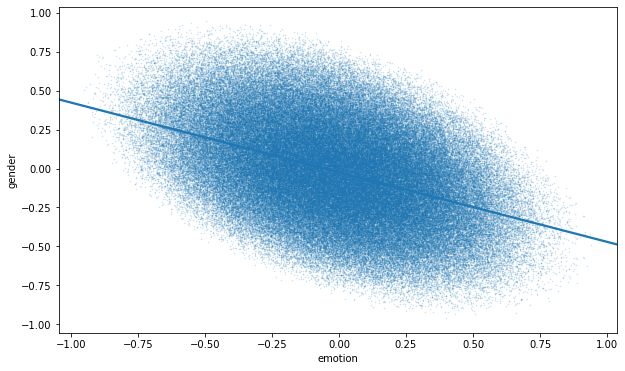

In [238]:
plt.rcParams['figure.figsize'] = [10,6]
ax = sns.regplot(x='emotion', y='gender', data=dimension_df, ci=99, scatter_kws={'s':0.3,'alpha':0.2})
plt.savefig('Pictures/gender-emotion')
plt.show()

In [232]:
reg(dimension_df['emotion'], dimension_df['gender'])

LinregressResult(slope=-0.4468402439648718, intercept=-0.02368720695922305, rvalue=-0.43212826085230294, pvalue=0.0, stderr=0.002031820196444852)

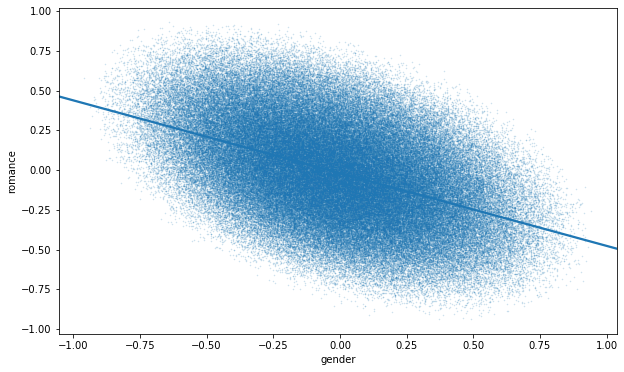

In [239]:
plt.rcParams['figure.figsize'] = [10,6]
ax = sns.regplot(x='gender', y='romance', data=dimension_df, ci=99, scatter_kws={'s':0.3,'alpha':0.2})
plt.savefig('Pictures/gender-romance')
plt.show()

In [237]:
reg(dimension_df['gender'], dimension_df['romance'])

LinregressResult(slope=-0.45775423017367517, intercept=-0.01903600677272079, rvalue=-0.4673063371679826, pvalue=0.0, stderr=0.0018869458377476895)

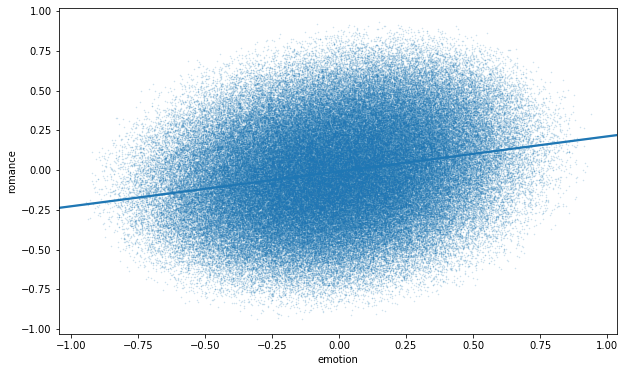

In [240]:
plt.rcParams['figure.figsize'] = [10,6]
ax = sns.regplot(x='emotion', y='romance', data=dimension_df, ci=99, scatter_kws={'s':0.3,'alpha':0.2})
plt.savefig('Pictures/emotion-romance')
plt.show()

In [235]:
reg(dimension_df['emotion'], dimension_df['romance'])

LinregressResult(slope=0.21990142436008397, intercept=-0.007966124765740018, rvalue=0.21709895655356282, pvalue=0.0, stderr=0.0021543500159208295)

### Linguistic Change and Trend

In [14]:
lyrics_groups = {index:df for index,df in list(lyrics_df.groupby(['genre']))}

In [134]:
# save the groups 
import joblib
joblib.dump(lyrics_groups, 'lyrics_group.joblib')

['lyrics_group.joblib']

In [15]:
common_year = set(pd.unique(lyrics_groups['Pop']['year']))
for g in lyrics_groups:
    years = pd.unique(lyrics_groups[g]['year'])
    common_year &= set(years)
    #print(g, len(years))
    #print(sorted(years))

In [16]:
lyrics_common_df = lyrics_df.loc[lyrics_df['year'].isin(common_year)]
lyrics_common_df

year           artist    genre  \
0       2009  beyonce-knowles      Pop   
1       2009  beyonce-knowles      Pop   
2       2009  beyonce-knowles      Pop   
3       2009  beyonce-knowles      Pop   
4       2009  beyonce-knowles      Pop   
...      ...              ...      ...   
210637  2012       edens-edge  Country   
210638  2012       edens-edge  Country   
210639  2012       edens-edge  Country   
210640  2012       edens-edge  Country   
210641  2012       edens-edge  Country   

                                                   lyrics  \
0       oh baby, how you doing? you know i'm gonna cut...   
1       playin' everything so easy, it's like you seem...   
2       if you search for tenderness it isn't hard to ...   
3       oh oh oh i, oh oh oh i   if i wrote a book abo...   
4       party the people, the people the party it's po...   
...                                                   ...   
210637  i gotta say boy, after only just a couple of d...   
210638  i helped you find her diamond ring you made me...   
210639  look at the couple in the corner booth looks a...   
210640  when i fly off this mortal earth and i'm measu...   
210641  i heard from a friend of a friend of a friend ...   

                                               normalized  
0       [oh, baby, know, be, gon, na, cut, right, chas...  
1       [playin, easy, like, sure, way, not, be, sure,...  
2       [search, tenderness, hard, find, love, need, l...  
3       [oh, oh, oh, oh, oh, oh, write, book, stand, t...  
4       [party, people, people, party, pop, sit, look,...  
...                                                   ...  
210637  [get, ta, boy, couple, date, hand, outright, b...  
210638  [help, find, diamond, ring, try, tomorrow, bec...  
210639  [look, couple, corner, booth, look, lot, like,...  
210640  [fly, mortal, earth, be, measure, depth, girth...  
210641  [hear, friend, friend, friend, finally, get, r...  

[198621 rows x 5 columns]

### Word Embedding-time analysis

In [31]:
lyrics_common_groups = {index:df for index,df in list(lyrics_common_df.groupby(['genre','year']))}

In [33]:
time_result_1 = {}
for k in pd.unique(lyrics_df['genre']):
    time_result_1[k] = {}
    for y in sorted(common_year):
        ids = lyrics_common_groups[(k,y)].index
        vec = np.mean([lyrics_D2V_10[i] for i in ids],axis=0)
        time_result_1[k][y] = vec
time_result_1

{'Pop': {2001: array([ 0.03870069, -0.04427937,  0.0671781 , -0.01247367,  0.01867735,
         -0.01368656,  0.01471273, -0.09935793, -0.04597552, -0.10194535],
        dtype=float32),
  2002: array([ 0.03498135, -0.03378335,  0.05793978,  0.0278909 ,  0.04582855,
         -0.01291324, -0.07188801,  0.02389622, -0.00972202, -0.08610151],
        dtype=float32),
  2004: array([-0.06064888, -0.00665148, -0.02089663, -0.00118378, -0.00428995,
          0.0190867 ,  0.01575468,  0.04588624, -0.06833688, -0.00311282],
        dtype=float32),
  2005: array([-0.02834239,  0.02296418,  0.00494347, -0.02640207,  0.00596123,
          0.0187873 , -0.0136582 ,  0.01424082, -0.0445216 , -0.00540743],
        dtype=float32),
  2006: array([-0.01347813, -0.01105428,  0.03722635,  0.0130979 ,  0.00170133,
          0.01866656, -0.0139181 , -0.04247097, -0.01322765, -0.01162503],
        dtype=float32),
  2007: array([-0.01149008,  0.0107946 , -0.0052054 , -0.00915315, -0.01630854,
         -0.001895

In [34]:
change_result_1 = []
for k in time_result_1:
    M = []
    for p in sorted(common_year):
        L = []
        for q in sorted(common_year):
            L.append(cosine(time_result_1[k][p],time_result_1[k][q]))
        M.append(L)
    change_result_1.append(np.array(M))
len(change_result_1)

10

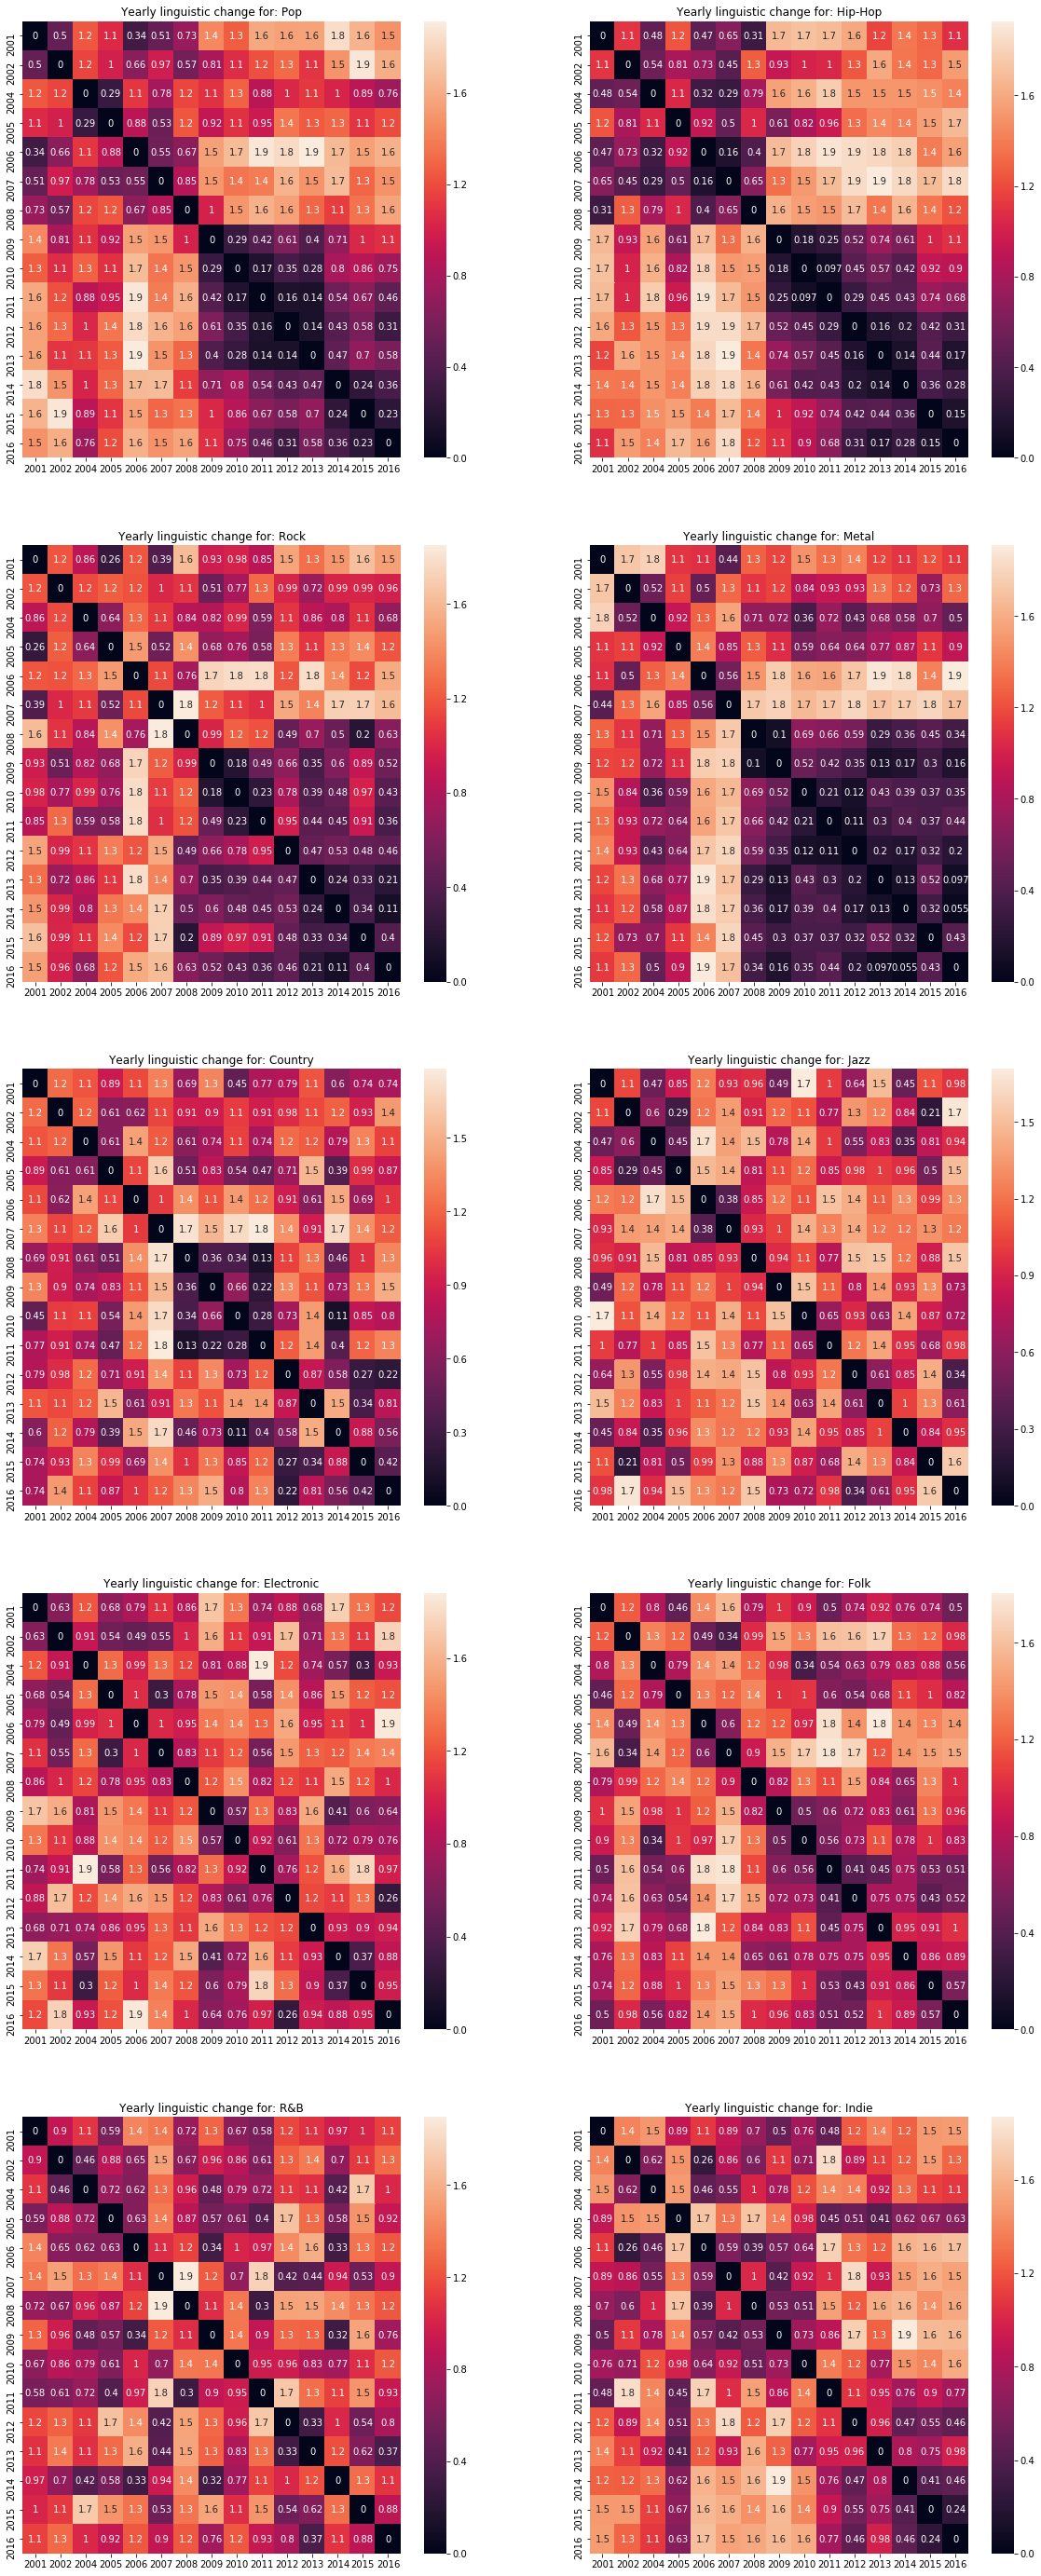

In [139]:
fig = plt.figure(figsize=[20,50])
for i in range(len(change_result_1)):
    ax = fig.add_subplot(5,2,i+1)
    genre = list(time_result_1.keys())[i]
    sns.heatmap(change_result_1[i], xticklabels=sorted(common_year), yticklabels=sorted(common_year), 
                ax = ax, annot = True) 
    ax.set_title("Yearly linguistic change for: {}".format(genre))
plt.savefig('Pictures/yearly linguistic difference in genre-embedding')
plt.show()

In [41]:
mean_year_divergence_1 = [(list(time_result_1.keys())[i], change_result_1[i].mean()) for i in range(10)]
sorted(mean_year_divergence_1, key= lambda x:x[1], reverse=True)

[('Indie', 0.9894700633123931),
 ('Electronic', 0.9852664723412858),
 ('Hip-Hop', 0.9829536579052607),
 ('Jazz', 0.967439858890656),
 ('Pop', 0.9531953274562127),
 ('R&B', 0.932265769491593),
 ('Folk', 0.9286244763702982),
 ('Country', 0.8936036794549889),
 ('Rock', 0.8703808393867479),
 ('Metal', 0.8218557396531105)]

In [146]:
std_year_divergence_1 = [(list(time_result_1.keys())[i], change_result_1[i].std()) for i in range(10)]
sorted(std_year_divergence_1, key= lambda x:x[1], reverse=True)

[('Hip-Hop', 0.5950569373737239),
 ('Metal', 0.5742619021145224),
 ('Pop', 0.527664533629314),
 ('Indie', 0.48940771342122047),
 ('Rock', 0.4869379871377922),
 ('Country', 0.4481393067214004),
 ('R&B', 0.44270478897585097),
 ('Electronic', 0.440014728026973),
 ('Folk', 0.4389631140606104),
 ('Jazz', 0.4215732720763286)]

In [38]:
# Visualize teh difference between music genres across each year
diff_result_1 = []
for y in sorted(common_year):
    M = []
    for k in time_result_1.keys():
        L = []
        for j in time_result_1.keys():
            L.append(cosine(time_result_1[k][y],time_result_1[j][y]))
        M.append(L)
    diff_result_1.append(np.array(M))
len(diff_result_1)

15

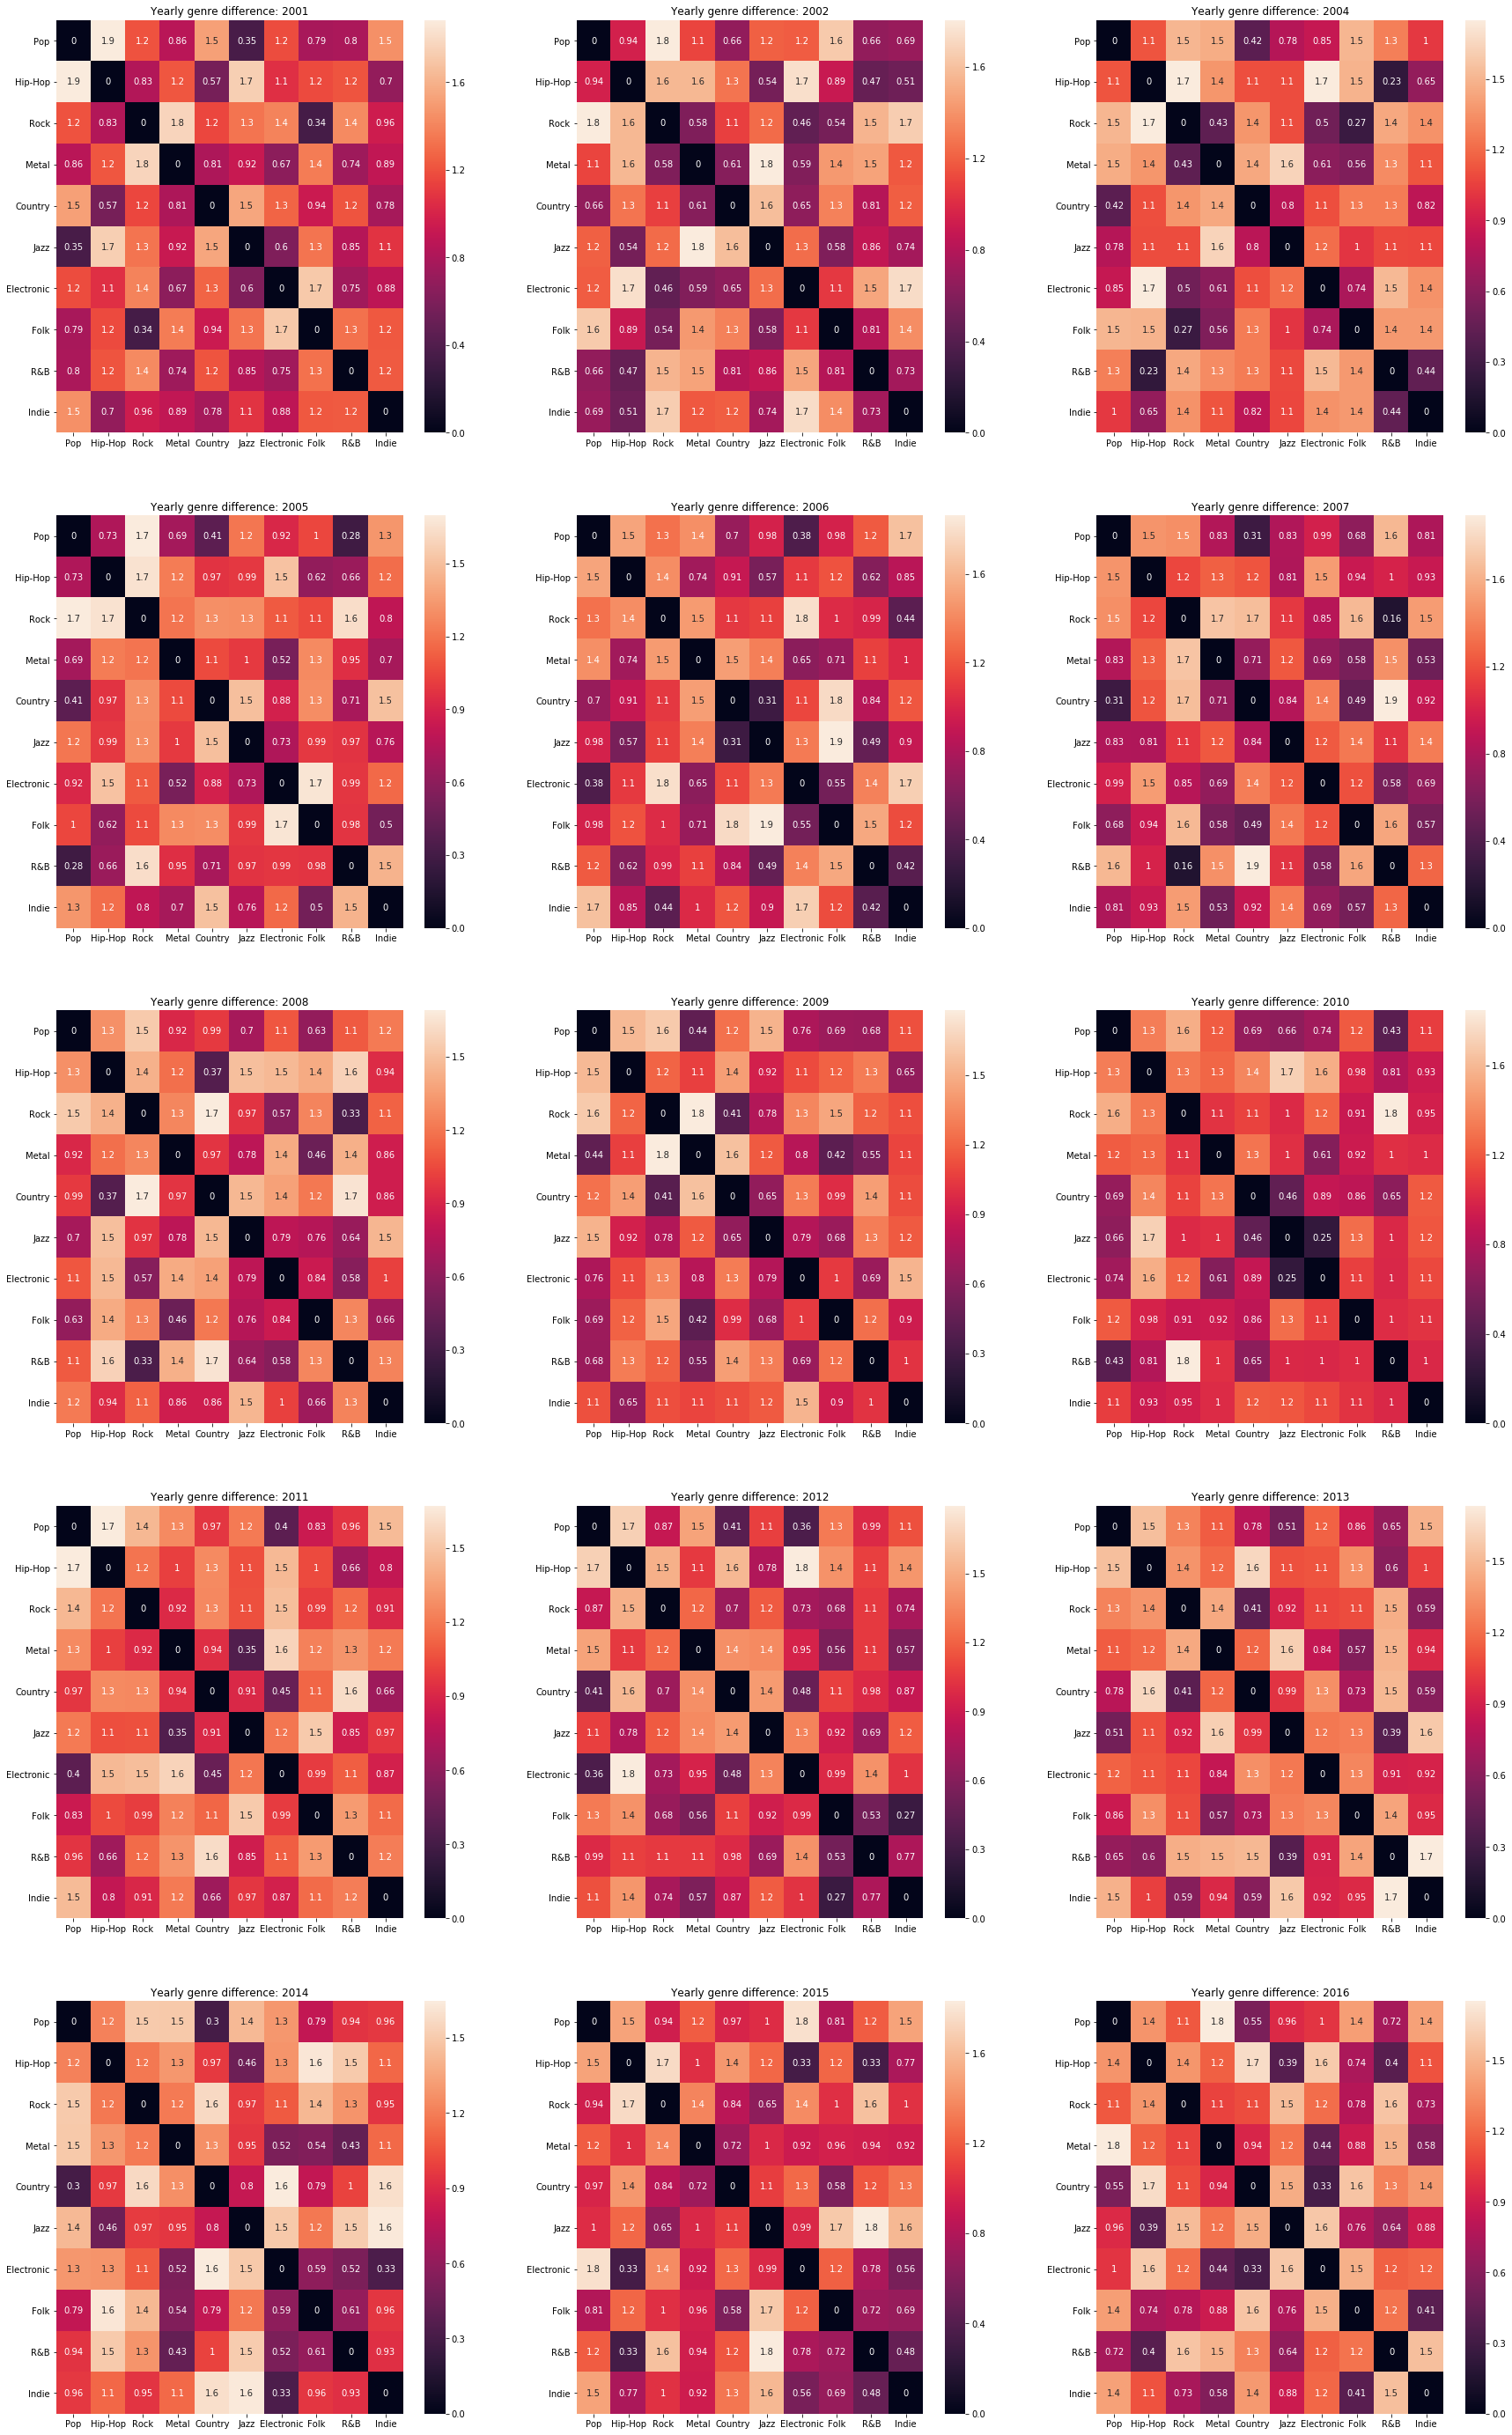

In [141]:
fig = plt.figure(figsize=[30,50])
for i in range(len(diff_result_1)):
    ax = fig.add_subplot(5,3,i+1)
    time = sorted(common_year)[i]
    sns.heatmap(diff_result_1[i], xticklabels=time_result_1.keys(), yticklabels=time_result_1.keys(), 
                ax = ax, annot = True) 
    ax.set_title("Yearly genre difference: {}".format(time))
plt.savefig('Pictures/yearly genre difference-embedding')
plt.show()

In [36]:
self_index = [(x,x) for x in time_result_1.keys()]
self_index

[('Pop', 'Pop'),
 ('Hip-Hop', 'Hip-Hop'),
 ('Rock', 'Rock'),
 ('Metal', 'Metal'),
 ('Country', 'Country'),
 ('Jazz', 'Jazz'),
 ('Electronic', 'Electronic'),
 ('Folk', 'Folk'),
 ('R&B', 'R&B'),
 ('Indie', 'Indie')]

In [39]:
diff_time_serials_1 = [[x.flatten()[i] for x in diff_result_1] for i in range(100)]
diff_time_index = [(x,y) for x in time_result_1.keys() for y in time_result_1.keys()]
diff_time_df_1 = pd.DataFrame(diff_time_serials_1, columns=sorted(common_year), index=diff_time_index)
diff_time_df_1 = diff_time_df_1.drop(labels=self_index, axis=0)
diff_time_df_1 = diff_time_df_1.drop_duplicates()
diff_time_df_1 = diff_time_df_1.transpose()

In [89]:
monotonic_check = [(c, diff_time_df_1[c].is_monotonic) for c in diff_time_df_1.columns]

In [215]:
from scipy.stats import linregress as reg
regression_check_1 = [(c, reg(diff_time_df_1.index, diff_time_df_1[c])) for c in diff_time_df_1.columns]
regression_check_1

[(('Pop', 'Hip-Hop'),
  LinregressResult(slope=0.013269898468754421, intercept=-25.26951423034142, rvalue=0.21078817176460318, pvalue=0.4507954565746295, stderr=0.017067918655179263)),
 (('Pop', 'Rock'),
  LinregressResult(slope=-0.028731655494101744, intercept=59.10985519357051, rvalue=-0.5068959146271961, pvalue=0.05379961457376308, stderr=0.013551304726381306)),
 (('Pop', 'Metal'),
  LinregressResult(slope=0.033836863915624814, intercept=-66.82202516628534, rvalue=0.4509536026618173, pvalue=0.09158439478415398, stderr=0.018574530855650934)),
 (('Pop', 'Country'),
  LinregressResult(slope=-0.014869264154081623, intercept=30.598923705614478, rvalue=-0.19476716151761006, pvalue=0.48668200964826525, stderr=0.020768467115100917)),
 (('Pop', 'Jazz'),
  LinregressResult(slope=0.016234973307531098, intercept=-31.652712063049567, rvalue=0.23182464478672787, pvalue=0.4057611855992813, stderr=0.01889404428934154)),
 (('Pop', 'Electronic'),
  LinregressResult(slope=0.011152662104399198, interce

In [217]:
sorted(regression_check_1, key=lambda x:x[1][3])[:10]

[(('Hip-Hop', 'Country'),
  LinregressResult(slope=0.046469846441760734, intercept=-92.16666607115663, rvalue=0.5789557309852968, pvalue=0.02373161106394927, stderr=0.018151104664987594)),
 (('Hip-Hop', 'Indie'),
  LinregressResult(slope=0.027209578769562353, intercept=-53.75490483599658, rvalue=0.5334984174505808, pvalue=0.0405489723363084, stderr=0.01196424323287086)),
 (('Folk', 'Indie'),
  LinregressResult(slope=-0.03956463362414718, intercept=80.36481796513492, rvalue=-0.5263998470718386, pvalue=0.043817064081991285, stderr=0.0177239204344252)),
 (('Jazz', 'Indie'),
  LinregressResult(slope=0.032657699123593086, intercept=-64.4336546982188, rvalue=0.5139720817079498, pvalue=0.05000282125724036, stderr=0.015116941057044858)),
 (('Pop', 'Rock'),
  LinregressResult(slope=-0.028731655494101744, intercept=59.10985519357051, rvalue=-0.5068959146271961, pvalue=0.05379961457376308, stderr=0.013551304726381306)),
 (('Electronic', 'Indie'),
  LinregressResult(slope=-0.042221207559460606, in

In [40]:
correlation_check_1 = [(c, pearsonr(diff_time_df_1.index, diff_time_df_1[c])) for c in diff_time_df_1.columns]
sorted(correlation_check_1, key=lambda x:x[1][1])[:10]

[(('Hip-Hop', 'Country'), (0.5789557309852968, 0.023731611063949304)),
 (('Hip-Hop', 'Indie'), (0.5334984174505808, 0.04054897233630842)),
 (('Folk', 'Indie'), (-0.5263998470718387, 0.043817064081991194)),
 (('Jazz', 'Indie'), (0.51397208170795, 0.050002821257240274)),
 (('Pop', 'Rock'), (-0.5068959146271961, 0.05379961457376306)),
 (('Electronic', 'Indie'), (-0.4969139054623096, 0.05950901800256635)),
 (('Pop', 'Metal'), (0.4509536026618172, 0.09158439478415403)),
 (('Rock', 'Indie'), (-0.4296674965484829, 0.10995030668120838)),
 (('Rock', 'Folk'), (0.3932881851244152, 0.14698337893687474)),
 (('Metal', 'Folk'), (-0.3931434983070562, 0.1471454802656259))]

In [178]:
ave_diff_1 = [(c, diff_time_df_1[c].mean()) for c in diff_time_df_1.columns]
sorted(ave_diff_1, key=lambda x:x[1])

In [180]:
std_diff_1 = [(c, diff_time_df_1[c].std()) for c in diff_time_df_1.columns]
sorted(std_diff_1, key=lambda x:x[1])

[(('Hip-Hop', 'Metal'), 0.18537276863923485),
 (('Rock', 'Jazz'), 0.22224696914483832),
 (('Metal', 'Indie'), 0.22690733313612854),
 (('Hip-Hop', 'Indie'), 0.23911781620139644),
 (('Hip-Hop', 'Rock'), 0.24961386428303786),
 (('Pop', 'Rock'), 0.2657450061774929),
 (('Pop', 'Indie'), 0.2777508346770192),
 (('Hip-Hop', 'Folk'), 0.2827589667355204),
 (('Pop', 'Hip-Hop'), 0.2951512423596992),
 (('Jazz', 'Indie'), 0.2978991794214554),
 (('Country', 'Indie'), 0.30738727398701754),
 (('Metal', 'Country'), 0.3112907700635169),
 (('Metal', 'Electronic'), 0.32132894382414545),
 (('Pop', 'Folk'), 0.32553198693338836),
 (('Pop', 'Jazz'), 0.32833352448842623),
 (('Rock', 'Indie'), 0.331781444615214),
 (('Folk', 'R&B'), 0.3325993415760252),
 (('Electronic', 'R&B'), 0.3428367060993523),
 (('Electronic', 'Folk'), 0.3482821302795723),
 (('Metal', 'R&B'), 0.348547607373163),
 (('Metal', 'Folk'), 0.3493097617580058),
 (('Pop', 'Metal'), 0.35178838528258416),
 (('Folk', 'Indie'), 0.35238275505123984),
 (('

#### Projection-time analysis

In [183]:
genres = pd.unique(lyrics_df['genre'])
genres

[Pop, Hip-Hop, Rock, Metal, Country, Jazz, Electronic, Folk, R&B, Indie]
Categories (10, object): [Pop, Hip-Hop, Rock, Metal, ..., Electronic, Folk, R&B, Indie]

In [184]:
emotion_df = pd.DataFrame(columns=genres, index=sorted(common_year))
for k in genres:
    for y in sorted(common_year):
        ids = lyrics_common_groups[(k,y)].index
        vec = np.mean([lyrics_D2V_10[i] for i in ids],axis=0)
        emotion_df.loc[y,k] = 1-cosine(vec, emotion)
emotion_df        

Pop    Hip-Hop       Rock      Metal    Country       Jazz  \
2001   0.219863 -0.0116738  -0.714186   0.504331  -0.161103   0.100004   
2002   0.172313   0.161564  -0.267107  -0.367206  -0.100811   0.243252   
2004   0.296889  -0.314122 -0.0453134  -0.115284   0.325238  0.0843904   
2005   0.704164   0.450458  -0.523345 -0.0257583   0.248714  -0.168476   
2006   0.105501 -0.0864195   0.246139  -0.404768   0.191802   0.406096   
2007    0.25019   0.173458  -0.345776  0.0870561   0.178776    0.42865   
2008  -0.533167    -0.0771   0.652621 -0.0960447  -0.556968  -0.212859   
2009  0.0065588   0.579545  -0.348805   0.180349  -0.480397  -0.508715   
2010    0.17588   0.326916  -0.330184  -0.109105  -0.393176  -0.222123   
2011   0.172646   0.237303  -0.201278 -0.0503503  -0.447015  -0.116082   
2012  -0.153743  -0.256203   0.499739   0.116704   0.318944  -0.275504   
2013 -0.0961342  -0.220346   0.136481    0.17767 -0.0445905  -0.116217   
2014  -0.380298 -0.0603178   0.194003   0.423637 -0.0117451   0.420436   
2015  -0.158267  -0.352819   0.591692  0.0520342 -0.0159247   0.241728   
2016 -0.0223284  -0.439285   0.153287   0.344068   0.557205    -0.4402   

     Electronic       Folk         R&B       Indie  
2001   0.197404  -0.543208    0.697999   -0.377854  
2002  -0.136954  -0.255609    0.153771    0.372736  
2004    0.39411   0.133059   0.0123742    0.129918  
2005  -0.230969   0.194858    0.474499  -0.0369138  
2006  -0.264222  -0.224979  -0.0706821    0.273376  
2007  -0.141046   0.371018   -0.235712   0.0360749  
2008   0.248582  -0.158615    0.281604    0.314585  
2009   -0.10081  0.0371436   -0.297294    0.152843  
2010  -0.158834  -0.143989    0.485867     0.29256  
2011  -0.192864 -0.0201354    0.452699   -0.501023  
2012   0.422943  0.0828492   -0.556083    0.137516  
2013   0.255973   0.514415   -0.350067    0.176862  
2014  -0.203115  -0.108456 -0.00726624   -0.558967  
2015  -0.245823  -0.282919   -0.253912  0.00187465  
2016   0.399417  -0.403496   -0.539289  0.00257577

In [44]:
emotion_df = pd.read_csv('emotion_time_serials.csv')

In [45]:
emotion_correlations = []
for i in emotion_df:
    emotion_correlations.append((i,pearsonr(emotion_df[i], emotion_df.index)))
sorted(emotion_correlations, key=lambda x:x[1][1])

[('Rock', (0.5825887429604506, 0.022664755884803444)),
 ('R&B', (-0.5808663797118176, 0.02316588101781824)),
 ('Pop', (-0.5617483890787166, 0.02931216287822357)),
 ('Hip-Hop', (-0.3908809336405912, 0.14969599779794718)),
 ('Metal', (0.3803926405270661, 0.16190550053808114)),
 ('Jazz', (-0.26069694564198387, 0.3480126867780915)),
 ('Indie', (-0.2005835313761777, 0.47349924401094323)),
 ('Country', (0.09403185289361413, 0.7388860086182641)),
 ('Electronic', (0.07637515080078658, 0.786750730003117)),
 ('Folk', (0.05838196125205122, 0.8362667197219257))]

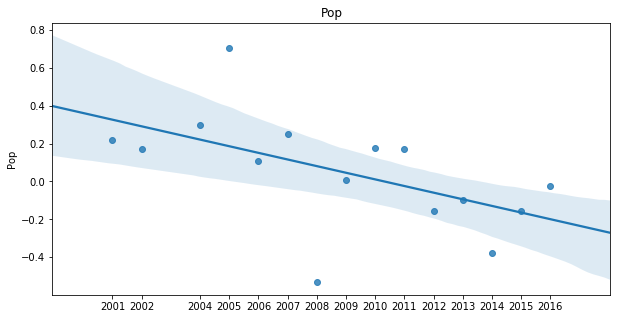

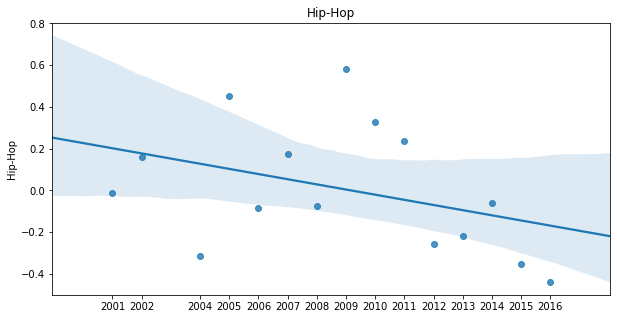

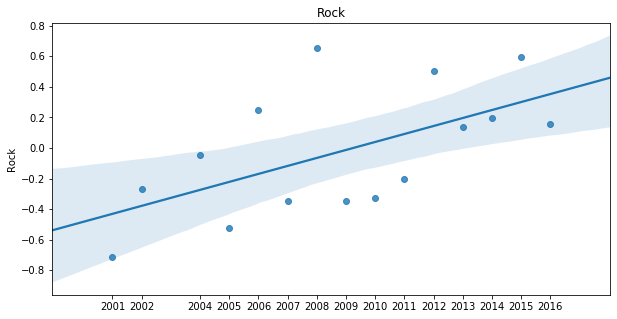

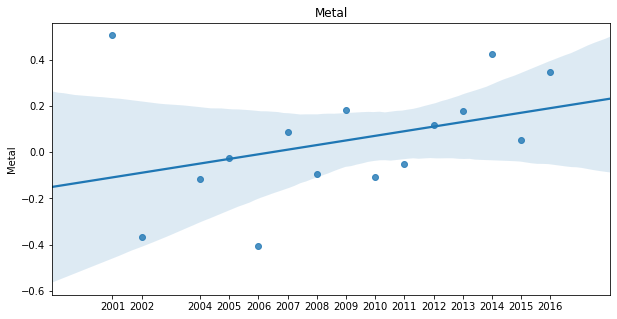

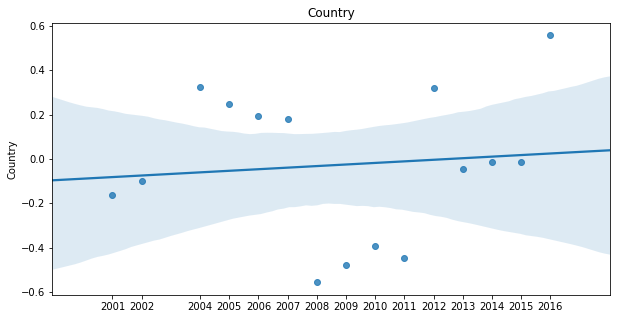

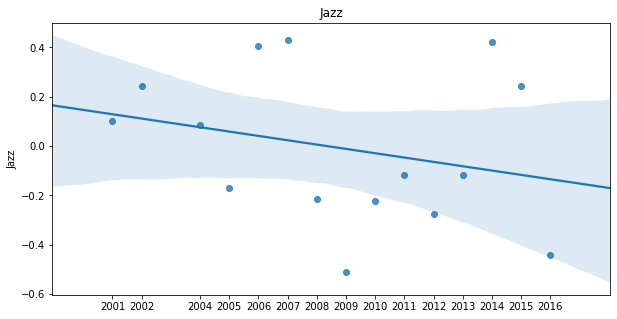

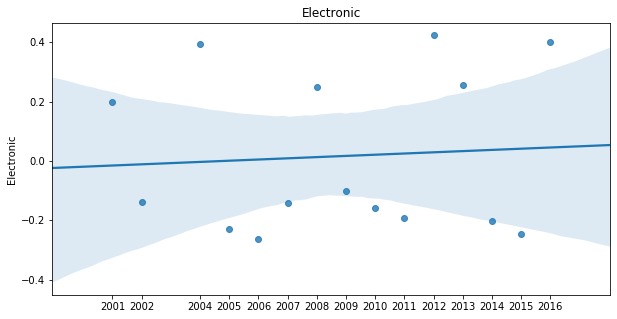

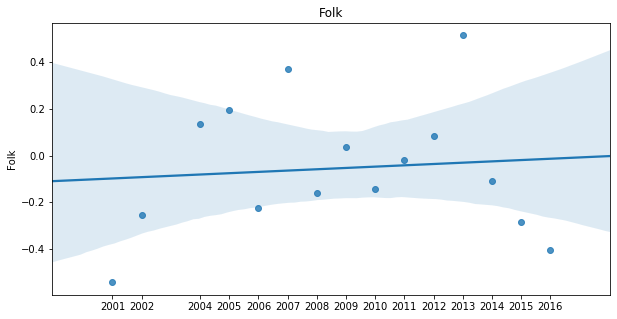

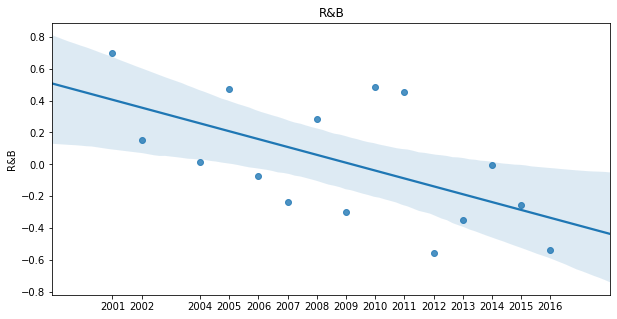

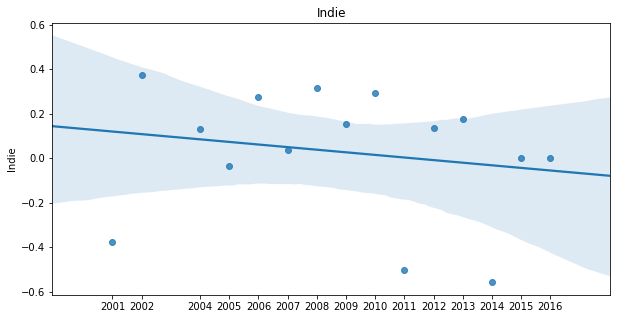

In [201]:
plt.rcParams['figure.figsize'] = [10,5]
for g in genres:
    ax = sns.regplot(np.array(emotion_df.index), emotion_df[g], ci=95)
    ax.set_xticks(emotion_df.index)
    plt.title(g)
    plt.show()

In [185]:
gender_df = pd.DataFrame(columns=genres, index=sorted(common_year))
for k in genres:
    for y in sorted(common_year):
        ids = lyrics_common_groups[(k,y)].index
        vec = np.mean([lyrics_D2V_10[i] for i in ids],axis=0)
        gender_df.loc[y,k] = 1-cosine(vec, gender)
gender_df        

Pop    Hip-Hop       Rock       Metal    Country       Jazz  \
2001   -0.424921   0.337709   0.120473  -0.0758218   0.435991   -0.23491   
2002   -0.269122  -0.204355   0.203011    0.112861  -0.112174   0.167846   
2004    0.368134   0.397794  -0.522609   -0.307349  0.0500134   0.118513   
2005  0.00376811    -0.3229 -0.0219823    0.178653   0.145793   0.350029   
2006   -0.216378  0.0936275  -0.018297     0.23693  -0.529592  -0.622636   
2007   -0.227678 -0.0790843   0.362734   -0.192178  -0.152118  -0.672427   
2008    0.299484  0.0393927  -0.684836   0.0851158   0.501229  0.0359153   
2009    0.271206  -0.297276 -0.0036287 -0.00399552   0.115998  -0.201076   
2010   -0.192671  -0.558974   0.386703     0.20922   0.491084   0.518456   
2011  -0.0151753  -0.440659   0.133586    0.390883   0.479026   0.672986   
2012    0.188469   0.150672   -0.47256    0.102904   -0.27738   0.150428   
2013    0.172437   0.201327  -0.219451  -0.0519654  -0.200597    0.15502   
2014    0.298716 -0.0534028  -0.130826   -0.100673   0.211016 -0.0283413   
2015    0.201836   0.212259  -0.447796    0.301522  -0.157476   0.219183   
2016   0.0221324    0.33706  -0.139743   -0.257339  -0.225685   0.315521   

      Electronic       Folk         R&B      Indie  
2001  -0.0462301  0.0642427   -0.536875   0.526739  
2002    0.169913    0.32756   -0.401727 -0.0656792  
2004   -0.171162  -0.583534  -0.0714463 -0.0474743  
2005    0.267012  -0.431193    0.190666  -0.253815  
2006    0.188193   0.624597    0.147307   0.284671  
2007   -0.109085   0.238444    0.191542  -0.208554  
2008    0.138838   0.387165    -0.22978   0.428508  
2009   -0.230139  -0.242982     0.44756   0.326679  
2010    0.179874  -0.294775   -0.238527   0.178347  
2011    0.185476  -0.645814   -0.205768   0.115237  
2012   -0.121268  -0.436754   -0.068011  -0.153872  
2013   -0.138472  -0.597268    0.252556  -0.288148  
2014   -0.293433  0.0308123   0.0048067 -0.0691865  
2015 -0.00481337 -0.0912386 -0.00934712  -0.349366  
2016   -0.113865  -0.334297    0.555371  -0.515122

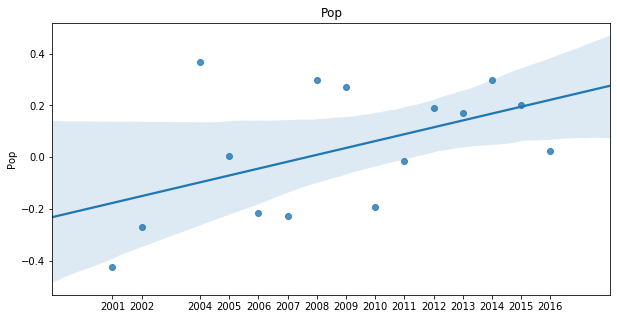

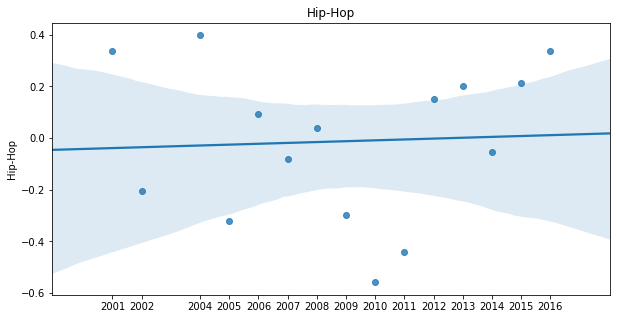

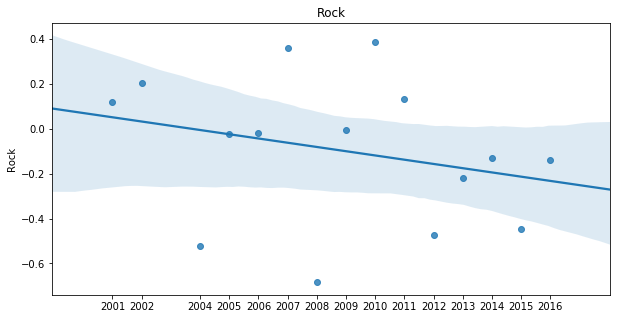

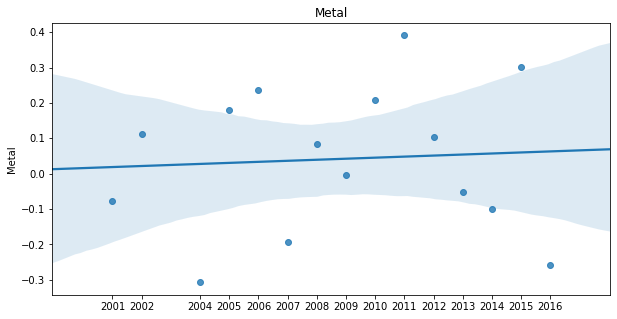

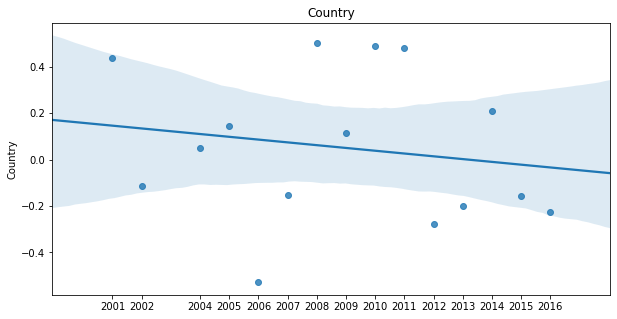

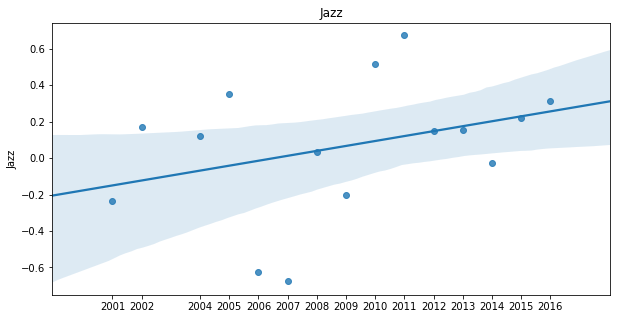

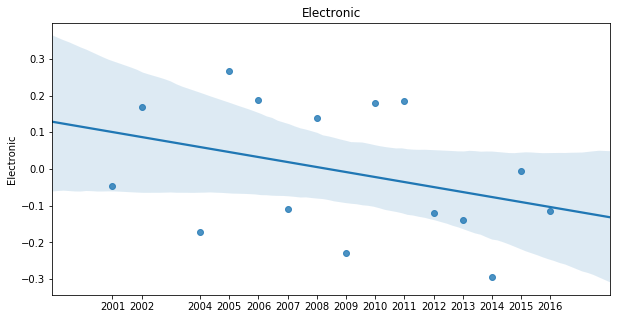

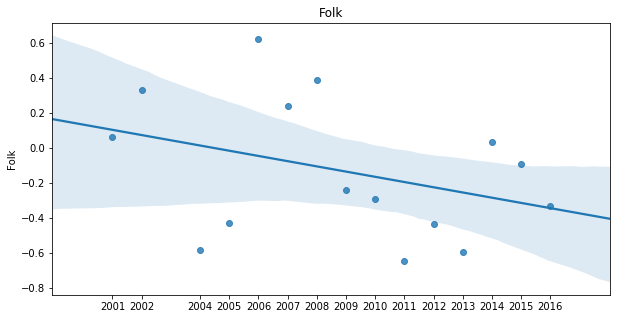

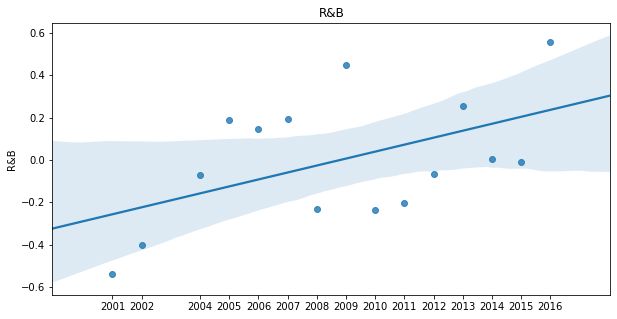

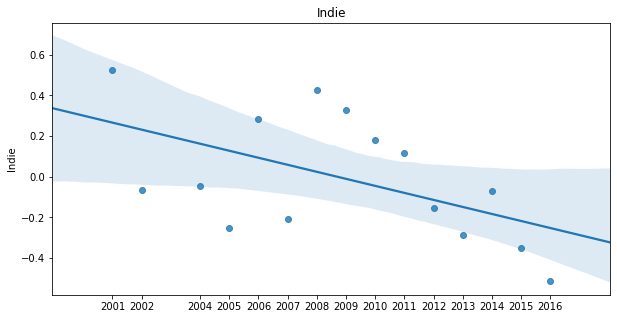

In [202]:
plt.rcParams['figure.figsize'] = [10,5]
for g in genres:
    ax = sns.regplot(np.array(gender_df.index), gender_df[g], ci=95)
    ax.set_xticks(gender_df.index)
    plt.title(g)
    plt.show()

In [47]:
gender_df = pd.read_csv('gender_time_serials.csv')
gender_correlations = []
for i in gender_df:
    gender_correlations.append((i,pearsonr(gender_df[i], gender_df.index)))
sorted(gender_correlations, key=lambda x:x[1][1])

[('Indie', (-0.5311123699122593, 0.04162653749796527)),
 ('R&B', (0.48512518488843204, 0.06680555799254478)),
 ('Pop', (0.4765710417713087, 0.07249021396913981)),
 ('Electronic', (-0.3610074461129036, 0.1861702924198886)),
 ('Jazz', (0.3475491997111957, 0.20433430160825947)),
 ('Folk', (-0.3433911259923851, 0.21016714752730986)),
 ('Rock', (-0.26201460696257745, 0.345492847995918)),
 ('Country', (-0.1717243589534632, 0.540563945299384)),
 ('Metal', (0.06660571169167209, 0.8135535359252749)),
 ('Hip-Hop', (0.06331910834735337, 0.8226152788381319))]

In [186]:
romance_df = pd.DataFrame(columns=genres, index=sorted(common_year))
for k in genres:
    for y in sorted(common_year):
        ids = lyrics_common_groups[(k,y)].index
        vec = np.mean([lyrics_D2V_10[i] for i in ids],axis=0)
        romance_df.loc[y,k] = 1-cosine(vec, romance)
romance_df        

Pop    Hip-Hop      Rock       Metal    Country      Jazz  \
2001    0.474541  -0.607201 -0.319217    0.350775   0.037579  0.373066   
2002   -0.311522   0.492517  0.100208    -0.53618   -0.25704  0.225141   
2004   -0.223762  0.0127553  0.132664    -0.23381  -0.126586  0.259478   
2005  -0.0885451   0.527732 -0.445207   0.0583894  -0.405084  0.334492   
2006     0.08632  -0.335305  0.370346   -0.197735  -0.136504  0.152275   
2007    0.486069   0.121578 -0.750099     0.32968   0.534882  0.176448   
2008   -0.361162  -0.510816  0.711556   0.0214471  -0.445794  0.269322   
2009   -0.353408   0.571497 -0.118599  -0.0232097  -0.426839  0.223535   
2010    0.277403   0.653899 -0.376799   -0.499394  -0.161972 -0.477716   
2011   0.0393186   0.484783  -0.31632   -0.320101  -0.566932 -0.261289   
2012  0.00389853   0.205268  0.174535   -0.241737 -0.0178927 -0.303283   
2013   -0.142288   -0.10083  0.134812    0.191791  -0.057022 -0.180047   
2014   -0.443921  0.0543305  0.414543 -0.00377648 -0.0270639  0.267901   
2015   0.0458742  -0.399903   0.56545    -0.50207 -0.0471542  0.426977   
2016   0.0774758  -0.437871  0.277288   0.0736351   0.209901 -0.501818   

     Electronic       Folk        R&B       Indie  
2001    0.20195  -0.135386  0.0878004   -0.374145  
2002   -0.47429   0.547634   0.493351  -0.0358095  
2004  -0.120961 -0.0895105   0.551942    0.604108  
2005   0.192588   0.104993   0.174223 -0.00106574  
2006  -0.312593  -0.251643   0.173378   0.0744508  
2007  0.0483354   0.446096   -0.54629    0.651034  
2008   0.397238  0.0776411    0.48634   -0.403821  
2009   0.110974 -0.0775185   0.026374    0.277444  
2010  -0.520988   -0.35266   0.239618   0.0303868  
2011  -0.027191 -0.0338288   0.515952   0.0335081  
2012  0.0783631  -0.301225   -0.19141   -0.596666  
2013 -0.0182796   0.112558  -0.411531    0.466213  
2014 -0.0648072  -0.111944  0.0535963   -0.277086  
2015   0.152091  -0.249153  -0.596026  -0.0262721  
2016   0.331336   0.259516  -0.236423   0.0527983

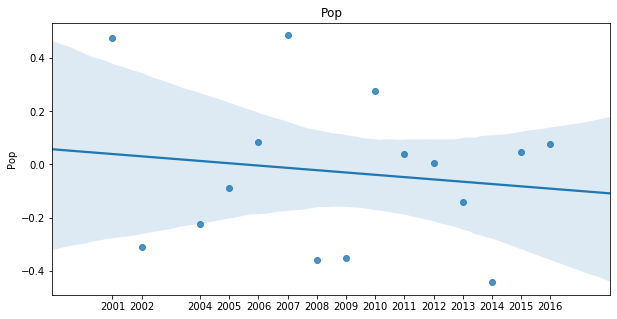

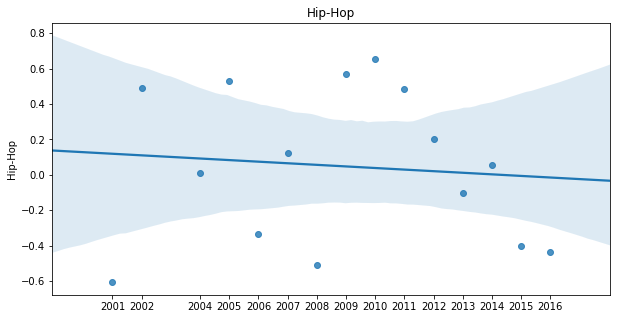

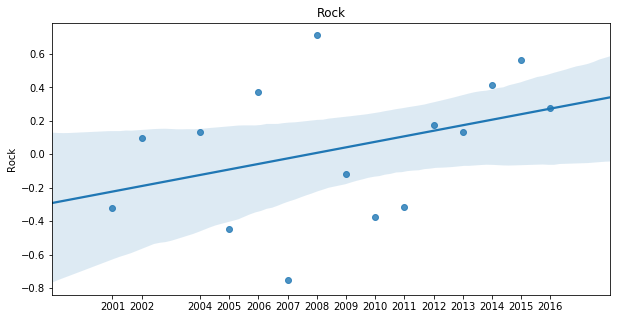

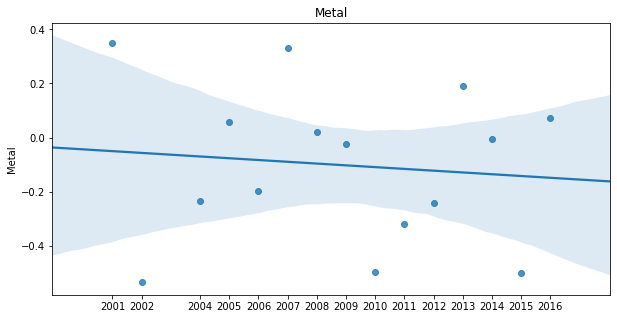

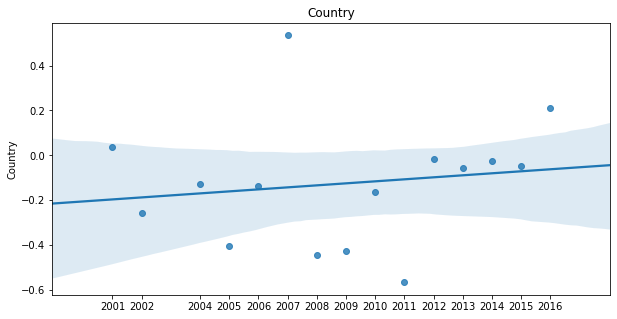

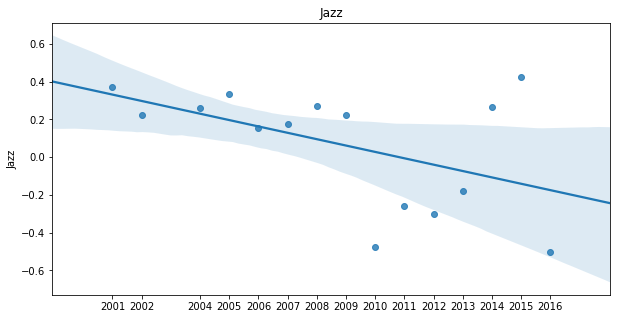

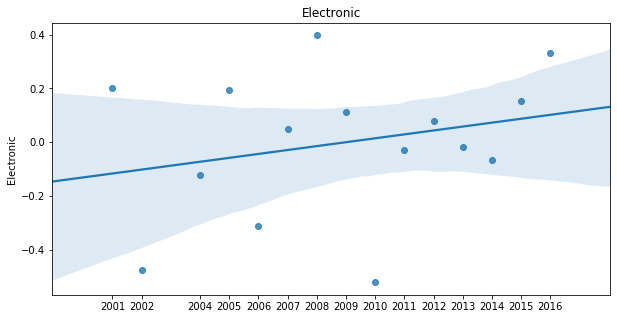

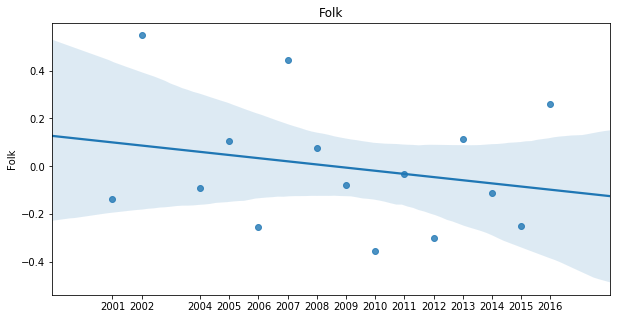

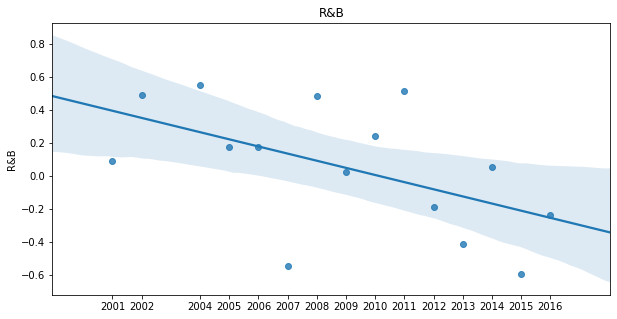

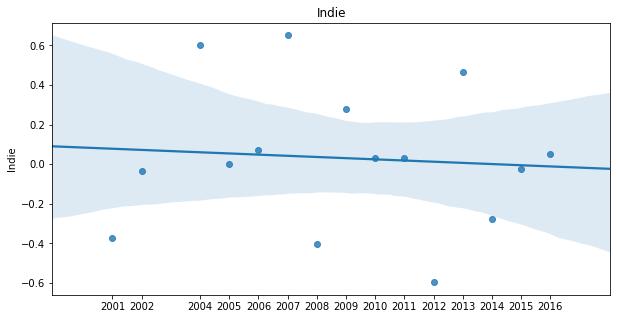

In [203]:
plt.rcParams['figure.figsize'] = [10,5]
for g in genres:
    ax = sns.regplot(np.array(romance_df.index), romance_df[g], ci=95)
    ax.set_xticks(romance_df.index)
    plt.title(g)
    plt.show()

In [48]:
romance_df = pd.read_csv('romance_time_serials.csv')
romance_correlations = []
for i in romance_df:
    romance_correlations.append((i,pearsonr(romance_df[i], romance_df.index)))
sorted(romance_correlations, key=lambda x:x[1][1])

[('R&B', (-0.5365797272799596, 0.039188286722640166)),
 ('Jazz', (-0.499516594384816, 0.05797969896855219)),
 ('Rock', (0.38252206246193804, 0.15937492323377292)),
 ('Electronic', (0.2508711847042061, 0.3671245626232163)),
 ('Folk', (-0.21931394654254888, 0.43225198450913155)),
 ('Country', (0.159605971651503, 0.5699078954208714)),
 ('Pop', (-0.13549568309457496, 0.6301774877262957)),
 ('Metal', (-0.11093271622275575, 0.6938867259871209)),
 ('Hip-Hop', (-0.10900404302213831, 0.698977271398265)),
 ('Indie', (-0.10222195132931793, 0.7169713999923393))]

In [187]:
emotion_df.to_csv('emotion_time_serials.csv',index=None)
romance_df.to_csv('romance_time_serials.csv',index=None)
gender_df.to_csv('gender_time_serials.csv',index=None)

### Word Frequency-time analysis

In [17]:
# creating customized stop word lists
from sklearn.feature_extraction import stop_words
my_stop_words = list(stop_words.ENGLISH_STOP_WORDS)
my_stop_words += [str(i) for i in range(10)]
my_stop_words += ['intro','verse','pre','post','lift','chorus','bridge',
                  'outro','instrumental']

In [18]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.8, min_df=0.01, stop_words=my_stop_words, norm='l2')
vects = TFVectorizer.fit_transform(lyrics_common_df['lyrics'])
vects.shape

(198621, 1028)

In [19]:
pca = sklearn.decomposition.PCA(n_components=20)
tdidf_pca = pca.fit_transform(vects.todense())

In [20]:
lyrics_common_df['PCA'] = list(tdidf_pca)
lyrics_common_groups = {index:df for index,df in list(lyrics_common_df.groupby(['genre','year']))}

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
time_result_2 = {}
for k in pd.unique(lyrics_df['genre']):
    time_result_2[k] = {}
    for y in sorted(common_year):
        vec = lyrics_common_groups[(k,y)]['PCA'].mean()
        time_result_2[k][y] = vec
time_result_2

{'Pop': {2001: array([ 0.05104161,  0.04343987, -0.00650169, -0.00844735,  0.01769108,
          0.01462257,  0.007381  ,  0.00387968, -0.00117909, -0.01160468,
          0.00098043, -0.0002445 , -0.0029393 ,  0.00959954, -0.00368747,
          0.00944658, -0.00415616, -0.0024131 ,  0.00371809,  0.00094049]),
  2002: array([ 0.05810448,  0.0166834 , -0.00548201, -0.02528605,  0.01439867,
          0.00649808, -0.00671076,  0.01589554,  0.01211735, -0.00772426,
          0.00572803, -0.0005247 ,  0.0029247 ,  0.00702254, -0.00703364,
          0.00750838,  0.00121595,  0.00249168,  0.00334755, -0.0015499 ]),
  2004: array([ 0.04379403,  0.01771159,  0.00172142, -0.01758877,  0.01087867,
          0.0051353 ,  0.00166561,  0.01346499,  0.00932608,  0.00157081,
          0.00859457, -0.00682803, -0.00126006,  0.0073756 ,  0.00406729,
          0.00337965, -0.00210074, -0.00605725,  0.00587677, -0.00079792]),
  2005: array([ 5.93990224e-02,  2.01187537e-02, -1.59165785e-03, -1.80802695e-02

In [133]:
change_result_2 = []
for k in time_result_2:
    M = []
    for p in sorted(common_year):
        L = []
        for q in sorted(common_year):
            L.append(cosine(time_result_2[k][p],time_result_2[k][q]))
        M.append(L)
    change_result_2.append(np.array(M))
len(change_result_2)

10

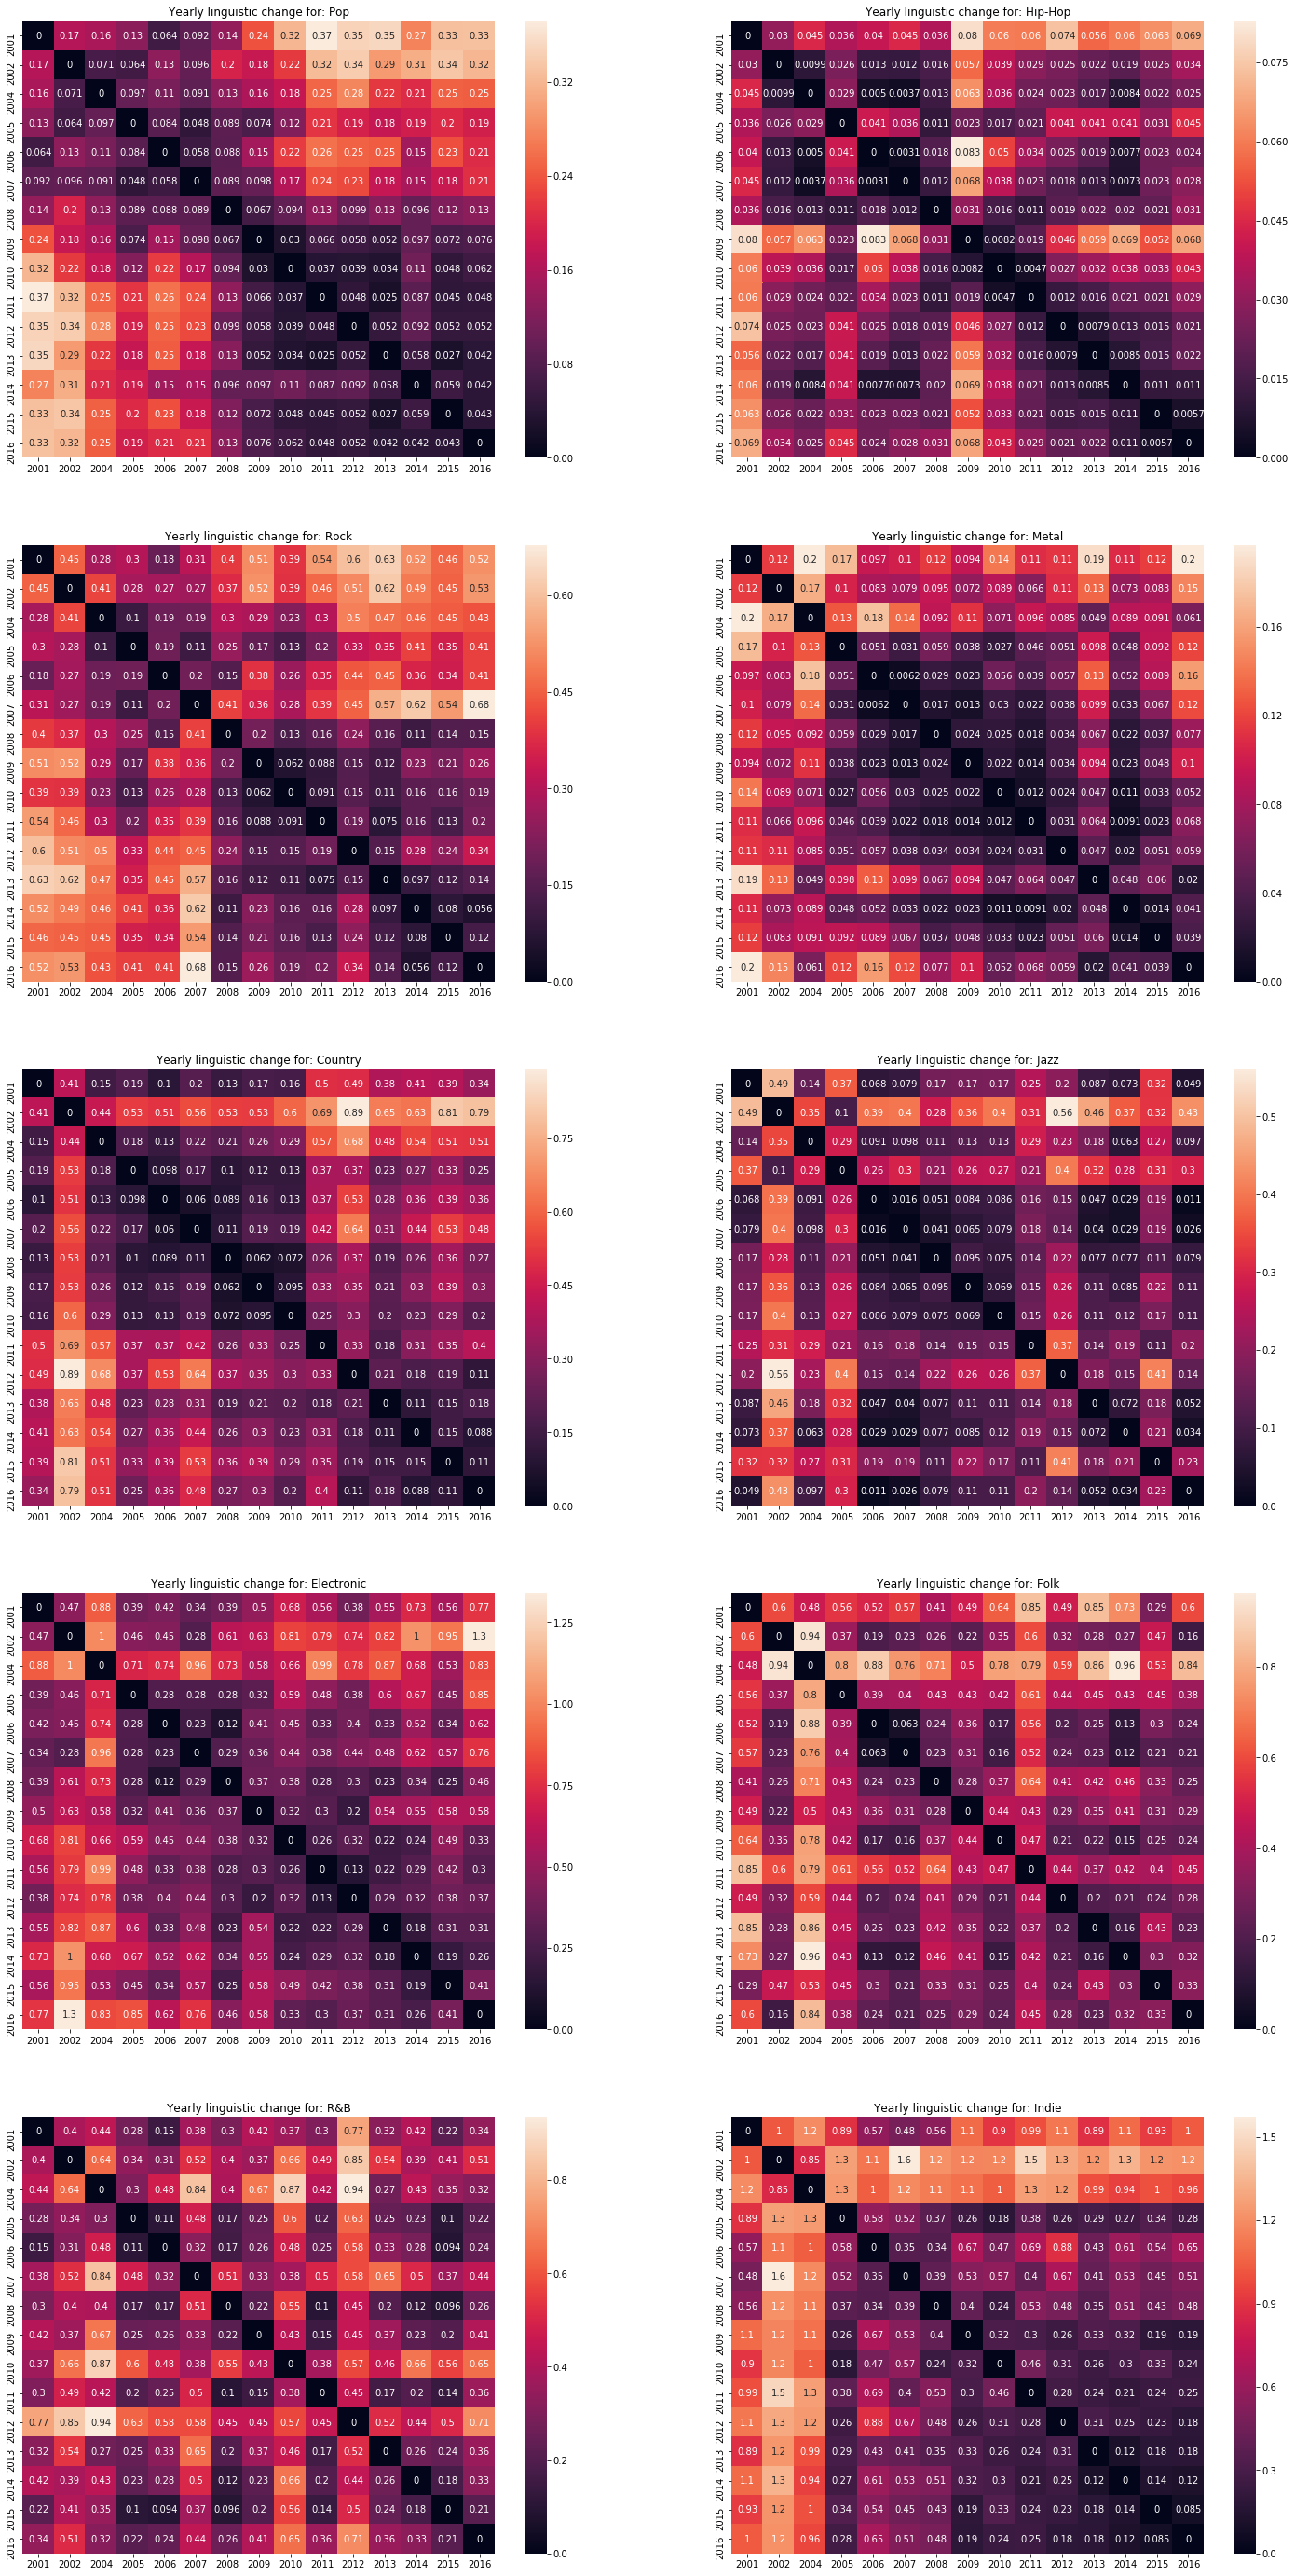

In [138]:
fig = plt.figure(figsize=[25,50])
for i in range(len(change_result_2)):
    ax = fig.add_subplot(5,2,i+1)
    genre = list(time_result_2.keys())[i]
    sns.heatmap(change_result_2[i], xticklabels=sorted(common_year), yticklabels=sorted(common_year), 
                ax = ax, annot = True) 
    ax.set_title("Yearly linguistic change for: {}".format(genre))
plt.savefig('Pictures/yearly linguistic difference in genre-frequency')
plt.show()

In [137]:
mean_year_divergence_2 = [(list(time_result_2.keys())[i], change_result_2[i].mean()) for i in range(10)]
sorted(mean_year_divergence_2, key= lambda x:x[1], reverse=True)

[('Indie', 0.5881414032415995),
 ('Electronic', 0.46010218524161656),
 ('Folk', 0.3845346311402999),
 ('R&B', 0.3641180085275074),
 ('Country', 0.298948451792123),
 ('Rock', 0.282615839495036),
 ('Jazz', 0.17387592683689143),
 ('Pop', 0.1407814522299779),
 ('Metal', 0.06674807138123008),
 ('Hip-Hop', 0.02770520607686663)]

In [144]:
std_year_divergence_2 = [(list(time_result_2.keys())[i], change_result_2[i].std()) for i in range(10)]
sorted(std_year_divergence_2, key= lambda x:x[1], reverse=True)

[('Indie', 0.41001611320708176),
 ('Electronic', 0.25516462141720997),
 ('Folk', 0.22092378924368133),
 ('R&B', 0.2013674425609081),
 ('Country', 0.19354389804298075),
 ('Rock', 0.169123893112475),
 ('Jazz', 0.12562422574501078),
 ('Pop', 0.09812811643048881),
 ('Metal', 0.0477736668407182),
 ('Hip-Hop', 0.019522888973899553)]

In [23]:
from scipy.spatial.distance import cosine
diff_result_2 = []
for y in sorted(common_year):
    M = []
    for k in time_result_2.keys():
        L = []
        for j in time_result_2.keys():
            L.append(cosine(time_result_2[k][y],time_result_2[j][y]))
        M.append(L)
    diff_result_2.append(np.array(M))
len(diff_result_2)

15

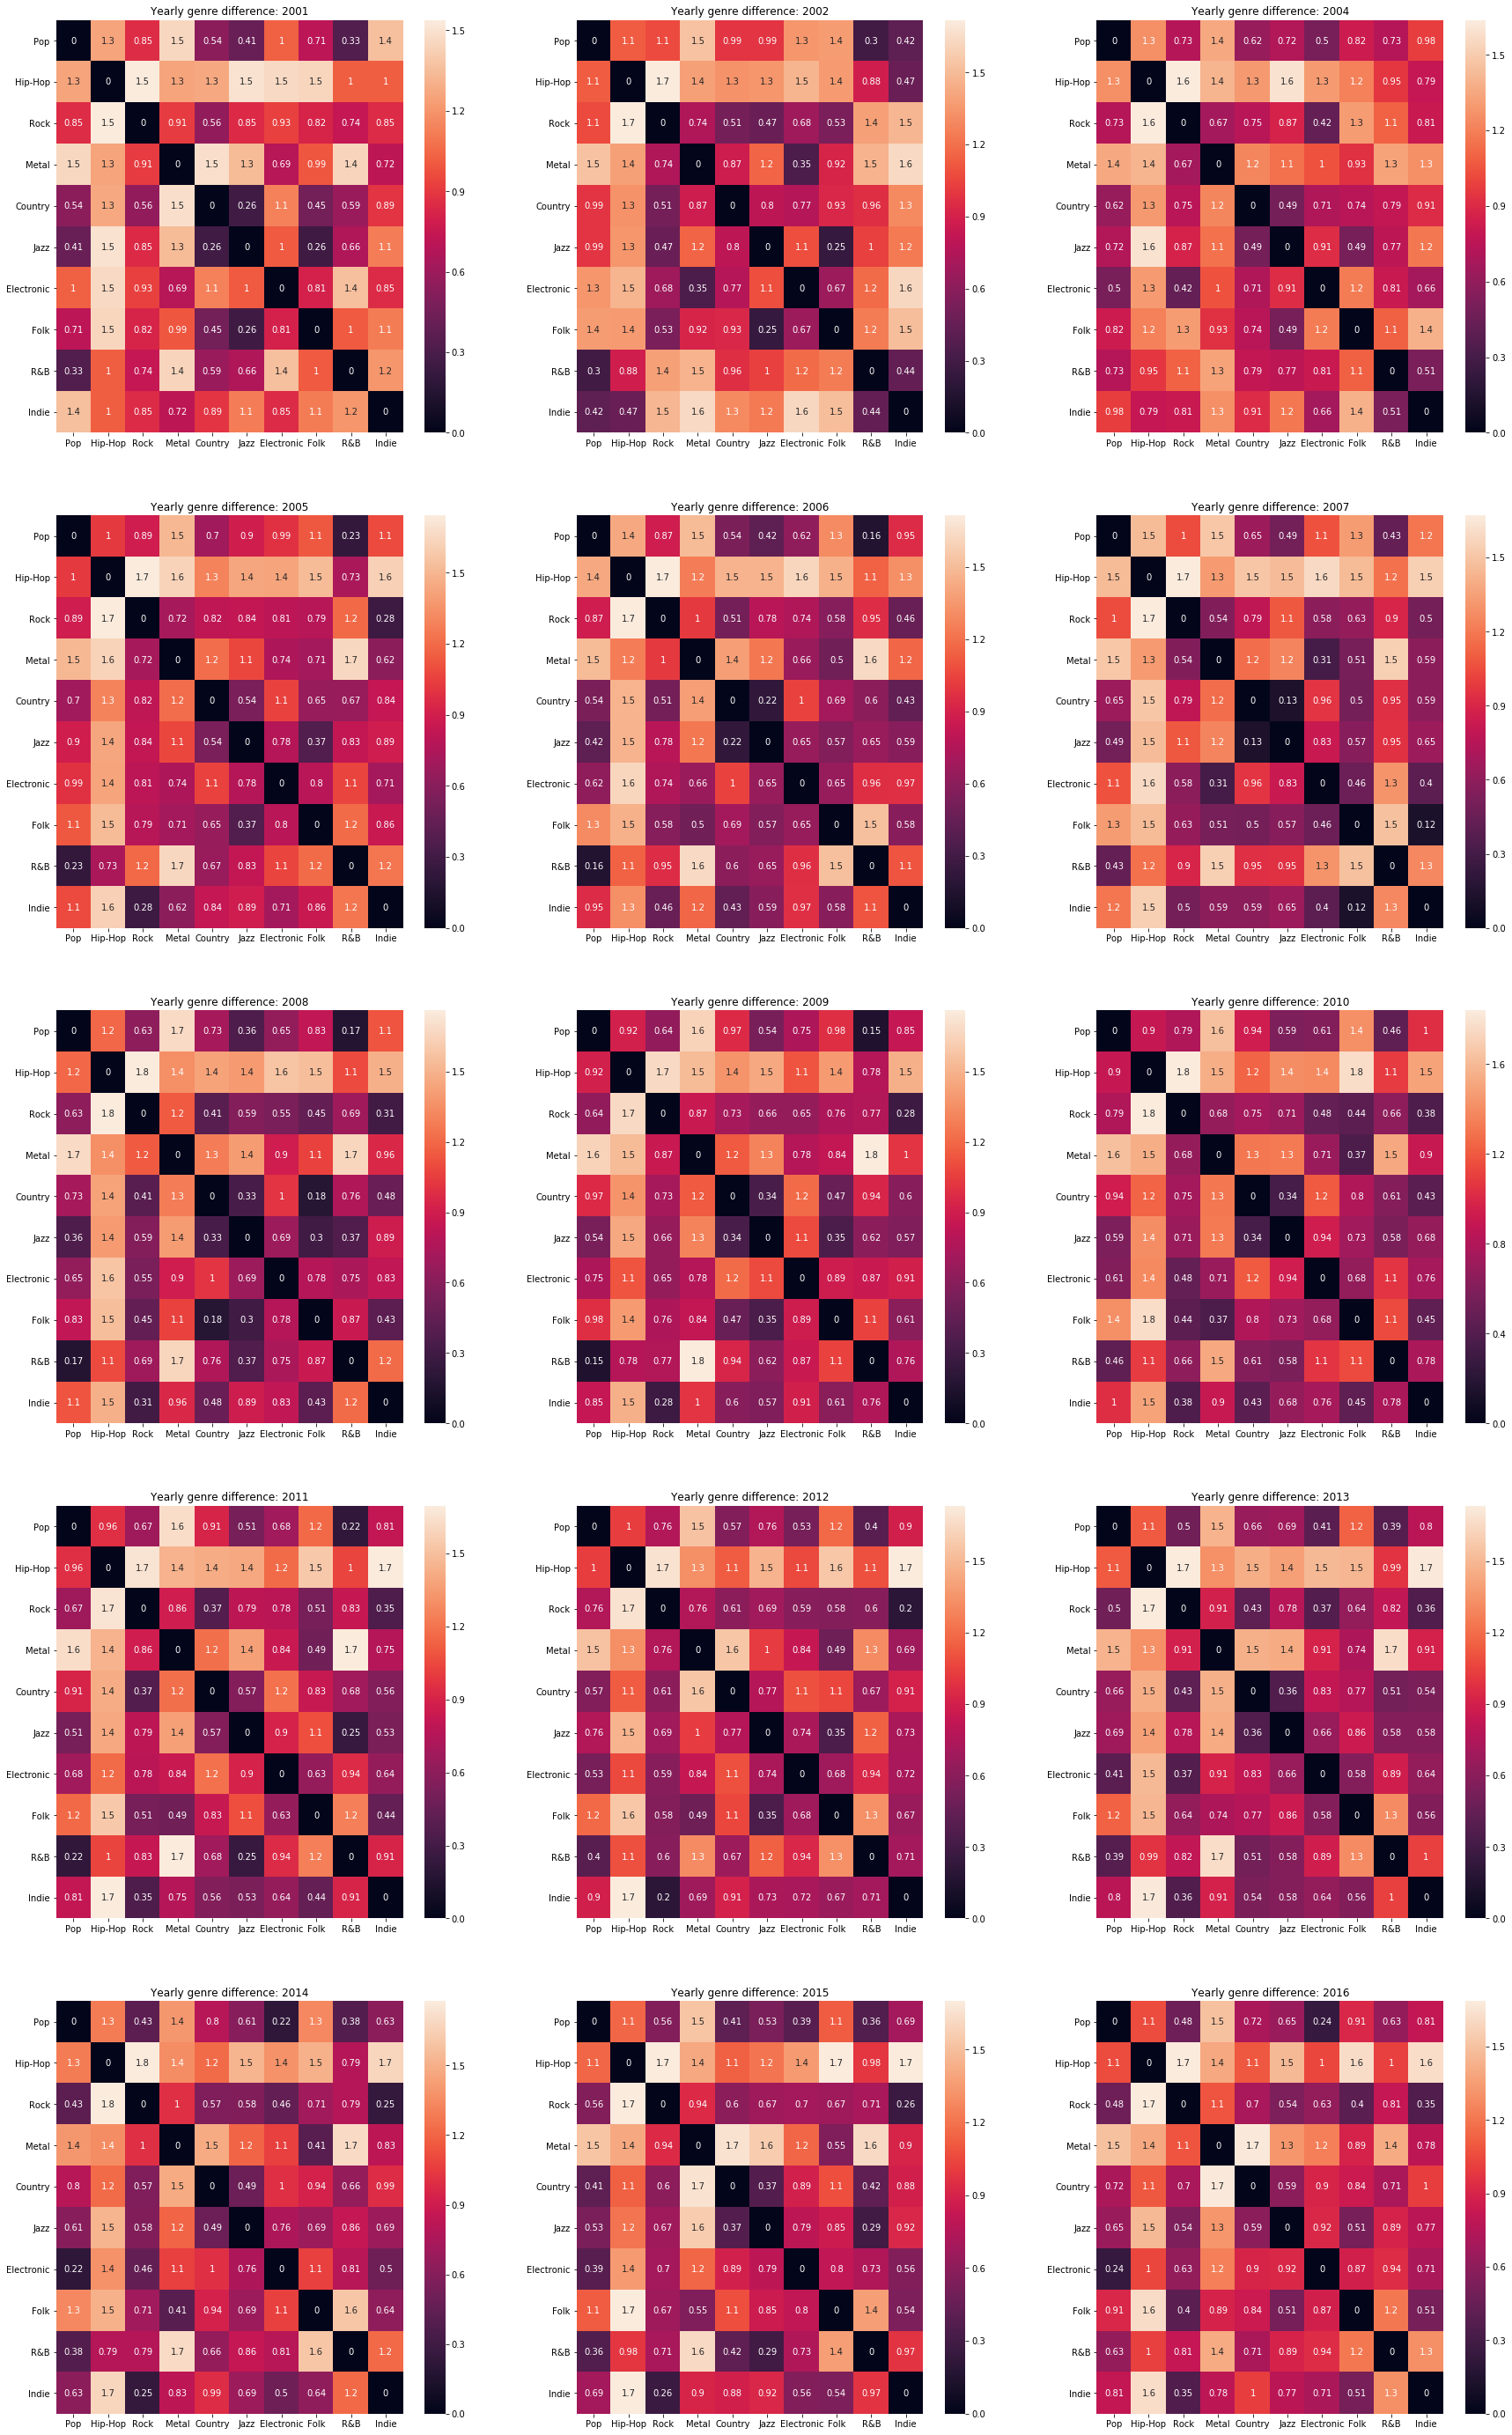

In [143]:
fig = plt.figure(figsize=[30,50])
for i in range(len(diff_result_2)):
    ax = fig.add_subplot(5,3,i+1)
    time = sorted(common_year)[i]
    sns.heatmap(diff_result_2[i], xticklabels=time_result_1.keys(), yticklabels=time_result_1.keys(), 
                ax = ax, annot = True) 
    ax.set_title("Yearly genre difference: {}".format(time))
plt.savefig('Pictures/yearly genre difference-frequency')
plt.show()

In [25]:
self_index = [(x,x) for x in time_result_2.keys()]

In [26]:
diff_time_serials_2 = [[x.flatten()[i] for x in diff_result_2] for i in range(100)]
diff_time_index = [(x,y) for x in time_result_2.keys() for y in time_result_2.keys()]
diff_time_df_2 = pd.DataFrame(diff_time_serials_2, columns=sorted(common_year), index=diff_time_index)
diff_time_df_2 = diff_time_df_2.drop(labels=self_index, axis=0)
diff_time_df_2 = diff_time_df_2.drop_duplicates()
diff_time_df_2 = diff_time_df_2.transpose()

In [27]:
diff_time_df_2 

(Pop, Hip-Hop)  (Pop, Rock)  (Pop, Metal)  (Pop, Country)  (Pop, Jazz)  \
2001        1.255649     0.860826      1.465329        0.545983     0.421122   
2002        1.124777     1.082924      1.540175        0.995380     0.994706   
2004        1.250956     0.745580      1.359460        0.616226     0.707332   
2005        1.021983     0.881968      1.505621        0.705342     0.896769   
2006        1.419554     0.880650      1.493154        0.546315     0.404958   
2007        1.453885     1.051926      1.505203        0.657259     0.484954   
2008        1.203651     0.621913      1.689554        0.722118     0.352009   
2009        0.917465     0.654543      1.654648        0.969337     0.536365   
2010        0.898836     0.794120      1.628115        0.940530     0.590044   
2011        0.963160     0.675308      1.643803        0.904075     0.515913   
2012        1.036326     0.761473      1.551068        0.583182     0.774771   
2013        1.141600     0.509020      1.485990        0.658964     0.684446   
2014        1.296436     0.428359      1.401043        0.798589     0.605246   
2015        1.156235     0.559738      1.522520        0.414677     0.519542   
2016        1.060687     0.473735      1.502800        0.714398     0.651042   

      (Pop, Electronic)  (Pop, Folk)  (Pop, R&B)  (Pop, Indie)  \
2001           1.007376     0.714980    0.333801      1.345878   
2002           1.329946     1.389269    0.292651      0.415094   
2004           0.496875     0.815590    0.730184      0.988351   
2005           0.996978     1.138316    0.235396      1.088577   
2006           0.614535     1.311492    0.153953      0.956405   
2007           1.077064     1.340403    0.433532      1.194332   
2008           0.658746     0.841006    0.152393      1.130607   
2009           0.761233     0.981628    0.158681      0.839232   
2010           0.620059     1.408282    0.450196      1.028678   
2011           0.681913     1.157918    0.227281      0.815071   
2012           0.531423     1.175627    0.367118      0.905456   
2013           0.415764     1.168089    0.385942      0.803279   
2014           0.221081     1.345854    0.372768      0.642699   
2015           0.395845     1.132074    0.361307      0.697183   
2016           0.247355     0.914319    0.617740      0.815155   

      (Hip-Hop, Rock)  ...  (Jazz, Electronic)  (Jazz, Folk)  (Jazz, R&B)  \
2001         1.547596  ...            0.998722      0.269638     0.687745   
2002         1.716116  ...            1.085224      0.268445     1.007163   
2004         1.635575  ...            0.895302      0.490769     0.764432   
2005         1.743203  ...            0.773153      0.400926     0.826185   
2006         1.721909  ...            0.634028      0.570837     0.640266   
2007         1.669818  ...            0.833146      0.582306     0.939365   
2008         1.759438  ...            0.693842      0.307494     0.365111   
2009         1.686348  ...            1.104361      0.348365     0.618816   
2010         1.841198  ...            0.958890      0.744277     0.569431   
2011         1.664006  ...            0.902070      1.073955     0.243819   
2012         1.682425  ...            0.746193      0.353904     1.153875   
2013         1.736736  ...            0.669864      0.865981     0.593426   
2014         1.778028  ...            0.765974      0.707451     0.858502   
2015         1.700990  ...            0.772743      0.844900     0.288344   
2016         1.688786  ...            0.925993      0.502030     0.875455   

      (Jazz, Indie)  (Electronic, Folk)  (Electronic, R&B)  \
2001       1.104846            0.772150           1.338931   
2002       1.244893            0.697204           1.183998   
2004       1.187149            1.236704           0.811720   
2005       0.913671            0.816772           1.061788   
2006       0.580314            0.660812           0.971013   
2007       0.661002            0.456697           1.297389   
2

In [28]:
monotonic_check_2 = [(c, diff_time_df_2[c].is_monotonic) for c in diff_time_df_2.columns]

In [29]:
from scipy.stats import linregress as reg
from scipy.stats import pearsonr
regression_check_2 = [(c, pearsonr(diff_time_df_2.index, diff_time_df_2[c])) for c in diff_time_df_2.columns]
regression_check_2

[(('Pop', 'Hip-Hop'), (-0.2695588330533331, 0.33126352683750293)),
 (('Pop', 'Rock'), (-0.7942681509212886, 0.0004052159460290576)),
 (('Pop', 'Metal'), (0.12039802526775534, 0.6690830959111181)),
 (('Pop', 'Country'), (-0.07597633679940803, 0.7878407577355925)),
 (('Pop', 'Jazz'), (-0.11715576220155473, 0.6775451540291513)),
 (('Pop', 'Electronic'), (-0.8032298202176051, 0.0003104809612762535)),
 (('Pop', 'Folk'), (0.17487994973237614, 0.5330337019559922)),
 (('Pop', 'R&B'), (0.16765497232672544, 0.5503431963220946)),
 (('Pop', 'Indie'), (-0.37968930831418807, 0.16274714950131508)),
 (('Hip-Hop', 'Rock'), (0.38078249812820125, 0.16144021940815703)),
 (('Hip-Hop', 'Metal'), (0.06579309960141116, 0.8157920532202015)),
 (('Hip-Hop', 'Country'), (-0.41255847323748673, 0.12645407690296429)),
 (('Hip-Hop', 'Jazz'), (-0.24046958355407205, 0.3879676604129353)),
 (('Hip-Hop', 'Electronic'), (-0.451829845126805, 0.09087815670365908)),
 (('Hip-Hop', 'Folk'), (0.6120023233726168, 0.01531576921301

In [30]:
sorted(regression_check_2, key=lambda x:x[1][1])[:10]

[(('Pop', 'Electronic'), (-0.8032298202176051, 0.0003104809612762535)),
 (('Pop', 'Rock'), (-0.7942681509212886, 0.0004052159460290576)),
 (('Hip-Hop', 'Indie'), (0.7796948999537088, 0.000608729143666695)),
 (('Rock', 'Indie'), (-0.7084305613589355, 0.0031160256967803415)),
 (('Metal', 'Electronic'), (0.6679290139165517, 0.006502084861355455)),
 (('Folk', 'Indie'), (-0.6354589644069641, 0.010902589715984443)),
 (('Metal', 'Country'), (0.6244044352197942, 0.012838070390251075)),
 (('Hip-Hop', 'Folk'), (0.6120023233726168, 0.015315769213019291)),
 (('Electronic', 'R&B'), (-0.6065656720581966, 0.016511563137598984)),
 (('Jazz', 'Indie'), (-0.5918355362807728, 0.02011413028341063))]

In [181]:
ave_diff_2 = [(c, diff_time_df_2[c].mean()) for c in diff_time_df_2.columns]
sorted(ave_diff_2, key=lambda x:x[1])

[(('Pop', 'R&B'), 0.3563211846010923),
 (('Country', 'Jazz'), 0.4410208550000348),
 (('Rock', 'Indie'), 0.4744646195330518),
 (('Jazz', 'Folk'), 0.5483613653261911),
 (('Rock', 'Country'), 0.6067764400395131),
 (('Pop', 'Jazz'), 0.6109182369472779),
 (('Rock', 'Electronic'), 0.6235178308533514),
 (('Rock', 'Folk'), 0.653099865577271),
 (('Pop', 'Electronic'), 0.6677734111761814),
 (('Metal', 'Folk'), 0.6934300327315314),
 (('Folk', 'Indie'), 0.6960375638928388),
 (('Jazz', 'R&B'), 0.699931283983321),
 (('Country', 'R&B'), 0.7013378947291361),
 (('Pop', 'Country'), 0.7151892296601429),
 (('Rock', 'Jazz'), 0.726390615872769),
 (('Pop', 'Rock'), 0.7282844780394),
 (('Country', 'Folk'), 0.7291622100346496),
 (('Country', 'Indie'), 0.7572012902573607),
 (('Electronic', 'Indie'), 0.7656922380941834),
 (('Electronic', 'Folk'), 0.7703236484525834),
 (('Jazz', 'Indie'), 0.8021272603382565),
 (('Metal', 'Electronic'), 0.8153228587317878),
 (('Jazz', 'Electronic'), 0.8491457469970133),
 (('Rock',

In [182]:
std_diff_2 = [(c, diff_time_df_2[c].std()) for c in diff_time_df_2.columns]
sorted(std_diff_2, key=lambda x:x[1])

[(('Hip-Hop', 'Rock'), 0.06854493020662875),
 (('Hip-Hop', 'Jazz'), 0.08777453745531355),
 (('Pop', 'Metal'), 0.09113007962017602),
 (('Hip-Hop', 'Metal'), 0.1049029441971023),
 (('Hip-Hop', 'Country'), 0.12872437402250175),
 (('Hip-Hop', 'Folk'), 0.13514393276066908),
 (('Hip-Hop', 'R&B'), 0.13580856033795596),
 (('Metal', 'R&B'), 0.1399580051972841),
 (('Metal', 'Jazz'), 0.14258048753322417),
 (('Rock', 'Country'), 0.14374537209382923),
 (('Jazz', 'Electronic'), 0.144451195628753),
 (('Rock', 'Electronic'), 0.15405286174617353),
 (('Rock', 'Jazz'), 0.15580529024902667),
 (('Country', 'R&B'), 0.15708785728245592),
 (('Country', 'Electronic'), 0.15729656583823215),
 (('Pop', 'R&B'), 0.16663254920989742),
 (('Rock', 'Metal'), 0.16890777825126072),
 (('Pop', 'Hip-Hop'), 0.1703237132993753),
 (('Pop', 'Country'), 0.17372633943850324),
 (('Pop', 'Jazz'), 0.17809711848780357),
 (('Electronic', 'Folk'), 0.18652745781320712),
 (('Hip-Hop', 'Electronic'), 0.18836670461527888),
 (('Electronic',